# **Predicting Employee Turnover: A Data-Driven Approach**

**Author: [Sabih Armaghan](https://linkedin.com/in/msabiharmaghan)** (linkedin.com/in/msabiharmaghan)

**Date:** March 09, 2024

***

Employee turnover is a challenge faced by businesses across various industries. The loss of valuable talent disrupts workflows, erodes knowledge, and incurs substantial costs associated with recruitment and training replacements. Understanding the factors that contribute to employee attrition is essential for developing effective retention strategies.

In this project, I will analyze a comprehensive [dataset obtained from Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv) using statistical modelling and machine learning techniques. The goal is to uncover patterns and identify the factors driving employee turnover. I will then use these insights to build a predictive model for employee turnover.

This work showcases how data driven approaches can empower HR departments to proactively identify at-risk employees and implement interventions designed to enhance retention.

## HR dataset Overview

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables:


| Variable  | Description |
| ------------- | ------------- |
| satisfaction_level  | Employee-reported job satisfaction level [0–1]  |
| last_evaluation  | Score of employee's last performance review [0–1]  |
| number_project  | Number of projects the employee contributes to  |
| average_monthly_hours  | Average number of hours employee worked per month  |
| time_spend_company  | How long the employee has been with the company (years)  |
| Work_accident  | Whether or not the employee experienced an accident while at work  |
| left  | Whether or not the employee left the company  |
| promotion_last_5years  | Whether or not the employee was promoted in the last 5 years  |
| Department  | The employee's department  |
| salary  | The employee's salary  |


## Data Loading and Preprocessing
**Importing Libraries**

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 7.5); plt.rcParams['figure.dpi'] = 264
import seaborn as sns
sns.set_palette("Set2")

# For preprocessing
from sklearn.preprocessing import LabelEncoder

# For hypothesis testing
from scipy import stats

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score

In [2]:
# Let's load the dataset and explore!

# Loading dataset into a Pandas dataframe
df0 = pd.read_csv("HR_dataset.csv")

pd.set_option('display.max_columns', None) # display all columns

# Displaying first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Data Cleaning

In [3]:
# Let's rename the columns and make them consistent.
df0 = df0.rename(columns={'Department': 'department',
                    'Work_accident': 'work_accident',
                    'average_montly_hours': 'average_monthly_hours',
                    'time_spend_company': 'tenure'})

# Let's confirm this
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Addressing Missing Values**

In [4]:
# Checking for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values.

**Addressing Duplicates**

In [5]:
# Checking for missing values
df0.duplicated().sum()

3008

3008 rows are duplicated. That's 20% of of the entire dataset.

In [6]:
# Inspecting some of these duplicated rows
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

How plausible is it that two employees reported the exact same response for all the columns? I could do a likelihood analysis based on Bayes' Theorem but that is not really necessary, given that there are several continuous variables across the 10 columns. It's highly unlikely that these entries are legitimate, so let's proceed by dropping these duplicated rows.

In [7]:
# Dropping duplicated rows
df = df0.drop_duplicates(keep='first')

**Addressing Outliers**

Certain types of models are more sensitive to outliers than others. Therefore, let's address any potential outliers.

Since we want to investigate employee turnover, it would be interesting to address any outlier in the "tenure" variable.

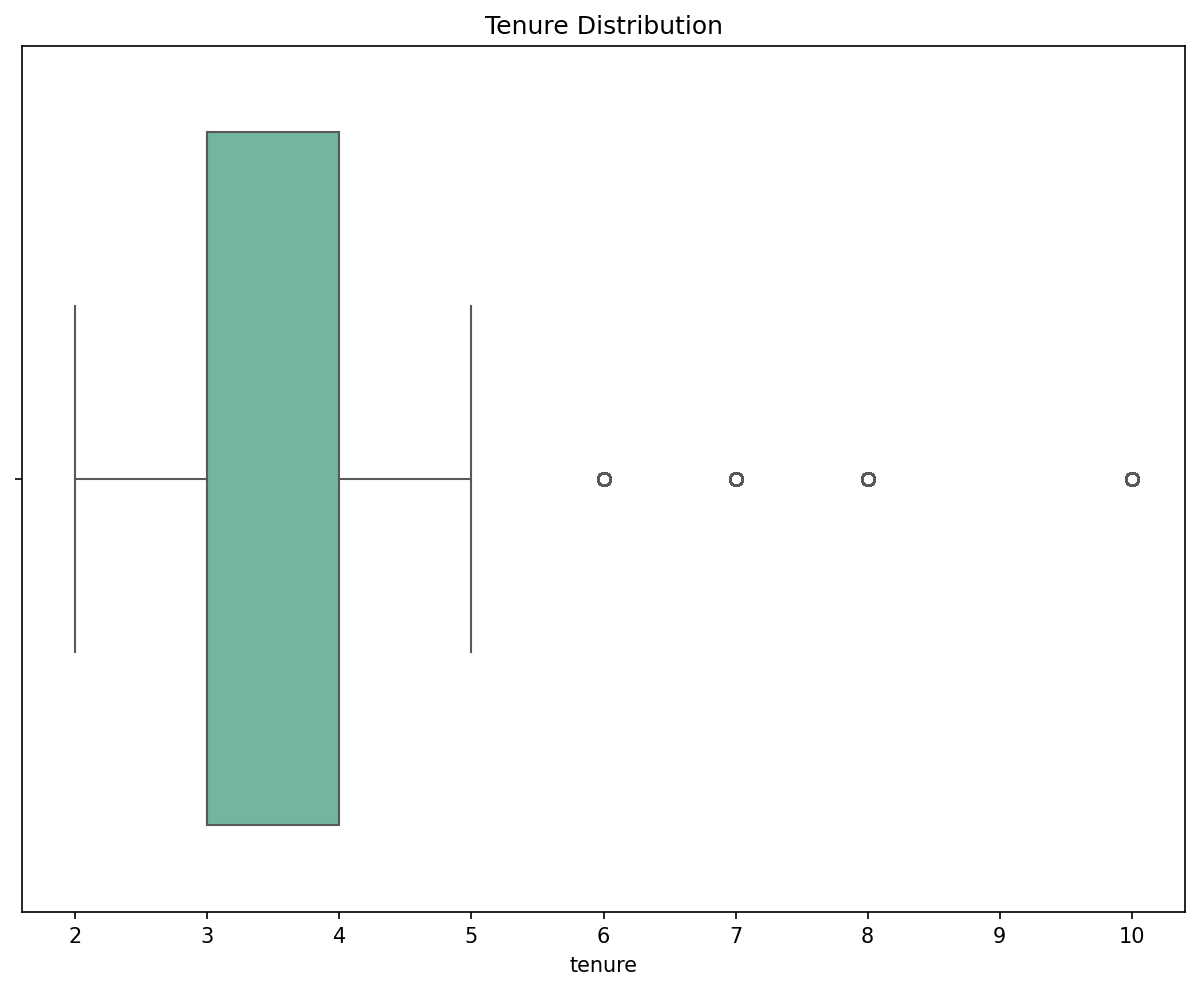

Lower limit: 1.5
Upper limit: 5.5
Number of rows in "tenure" with outliers: 824


In [8]:
# Distribution of "tenure" and including any outliers
plt.figure(dpi=150)
plt.title("Tenure Distribution")
sns.boxplot(x=df["tenure"]); plt.show()

# Computing the interquartile range in 'tenure'
Q3 = df['tenure'].quantile(0.75)
Q1 = df['tenure'].quantile(0.25)
IQR = Q3 - Q1

# Defining the upper limit and lower limit for non-outlier values in 'tenure'
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

print("Number of rows in \"tenure\" with outliers:", len(outliers))

We have a cleaner dataset now. Let's delve into it.

## **Exploratory Data Analysis (EDA)**

**Data Summary**

In [9]:
# Let's gather descriptive statistics about the data
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours        tenure  work_accident          left  \
count           11991.000000  11991.000000   11991.000000  11991.000000   
mean              200.473522      3.364857       0.154282      0.166041   
std                48.727813      1.330240       0.361234      0.372133   
min                96.000000      2.000000       0.000000      0.000000   
25%               157.000000      3.000000       0.000000      0.000000   
50%               200.000000      3.000000       0.000000      0.000000   
75%               243.000000      4.000000       0.000000      0.000000   
max               310.000000     10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

Let's understand this data through visualizations.
### Data Visualization

**People who left vs. stayed**

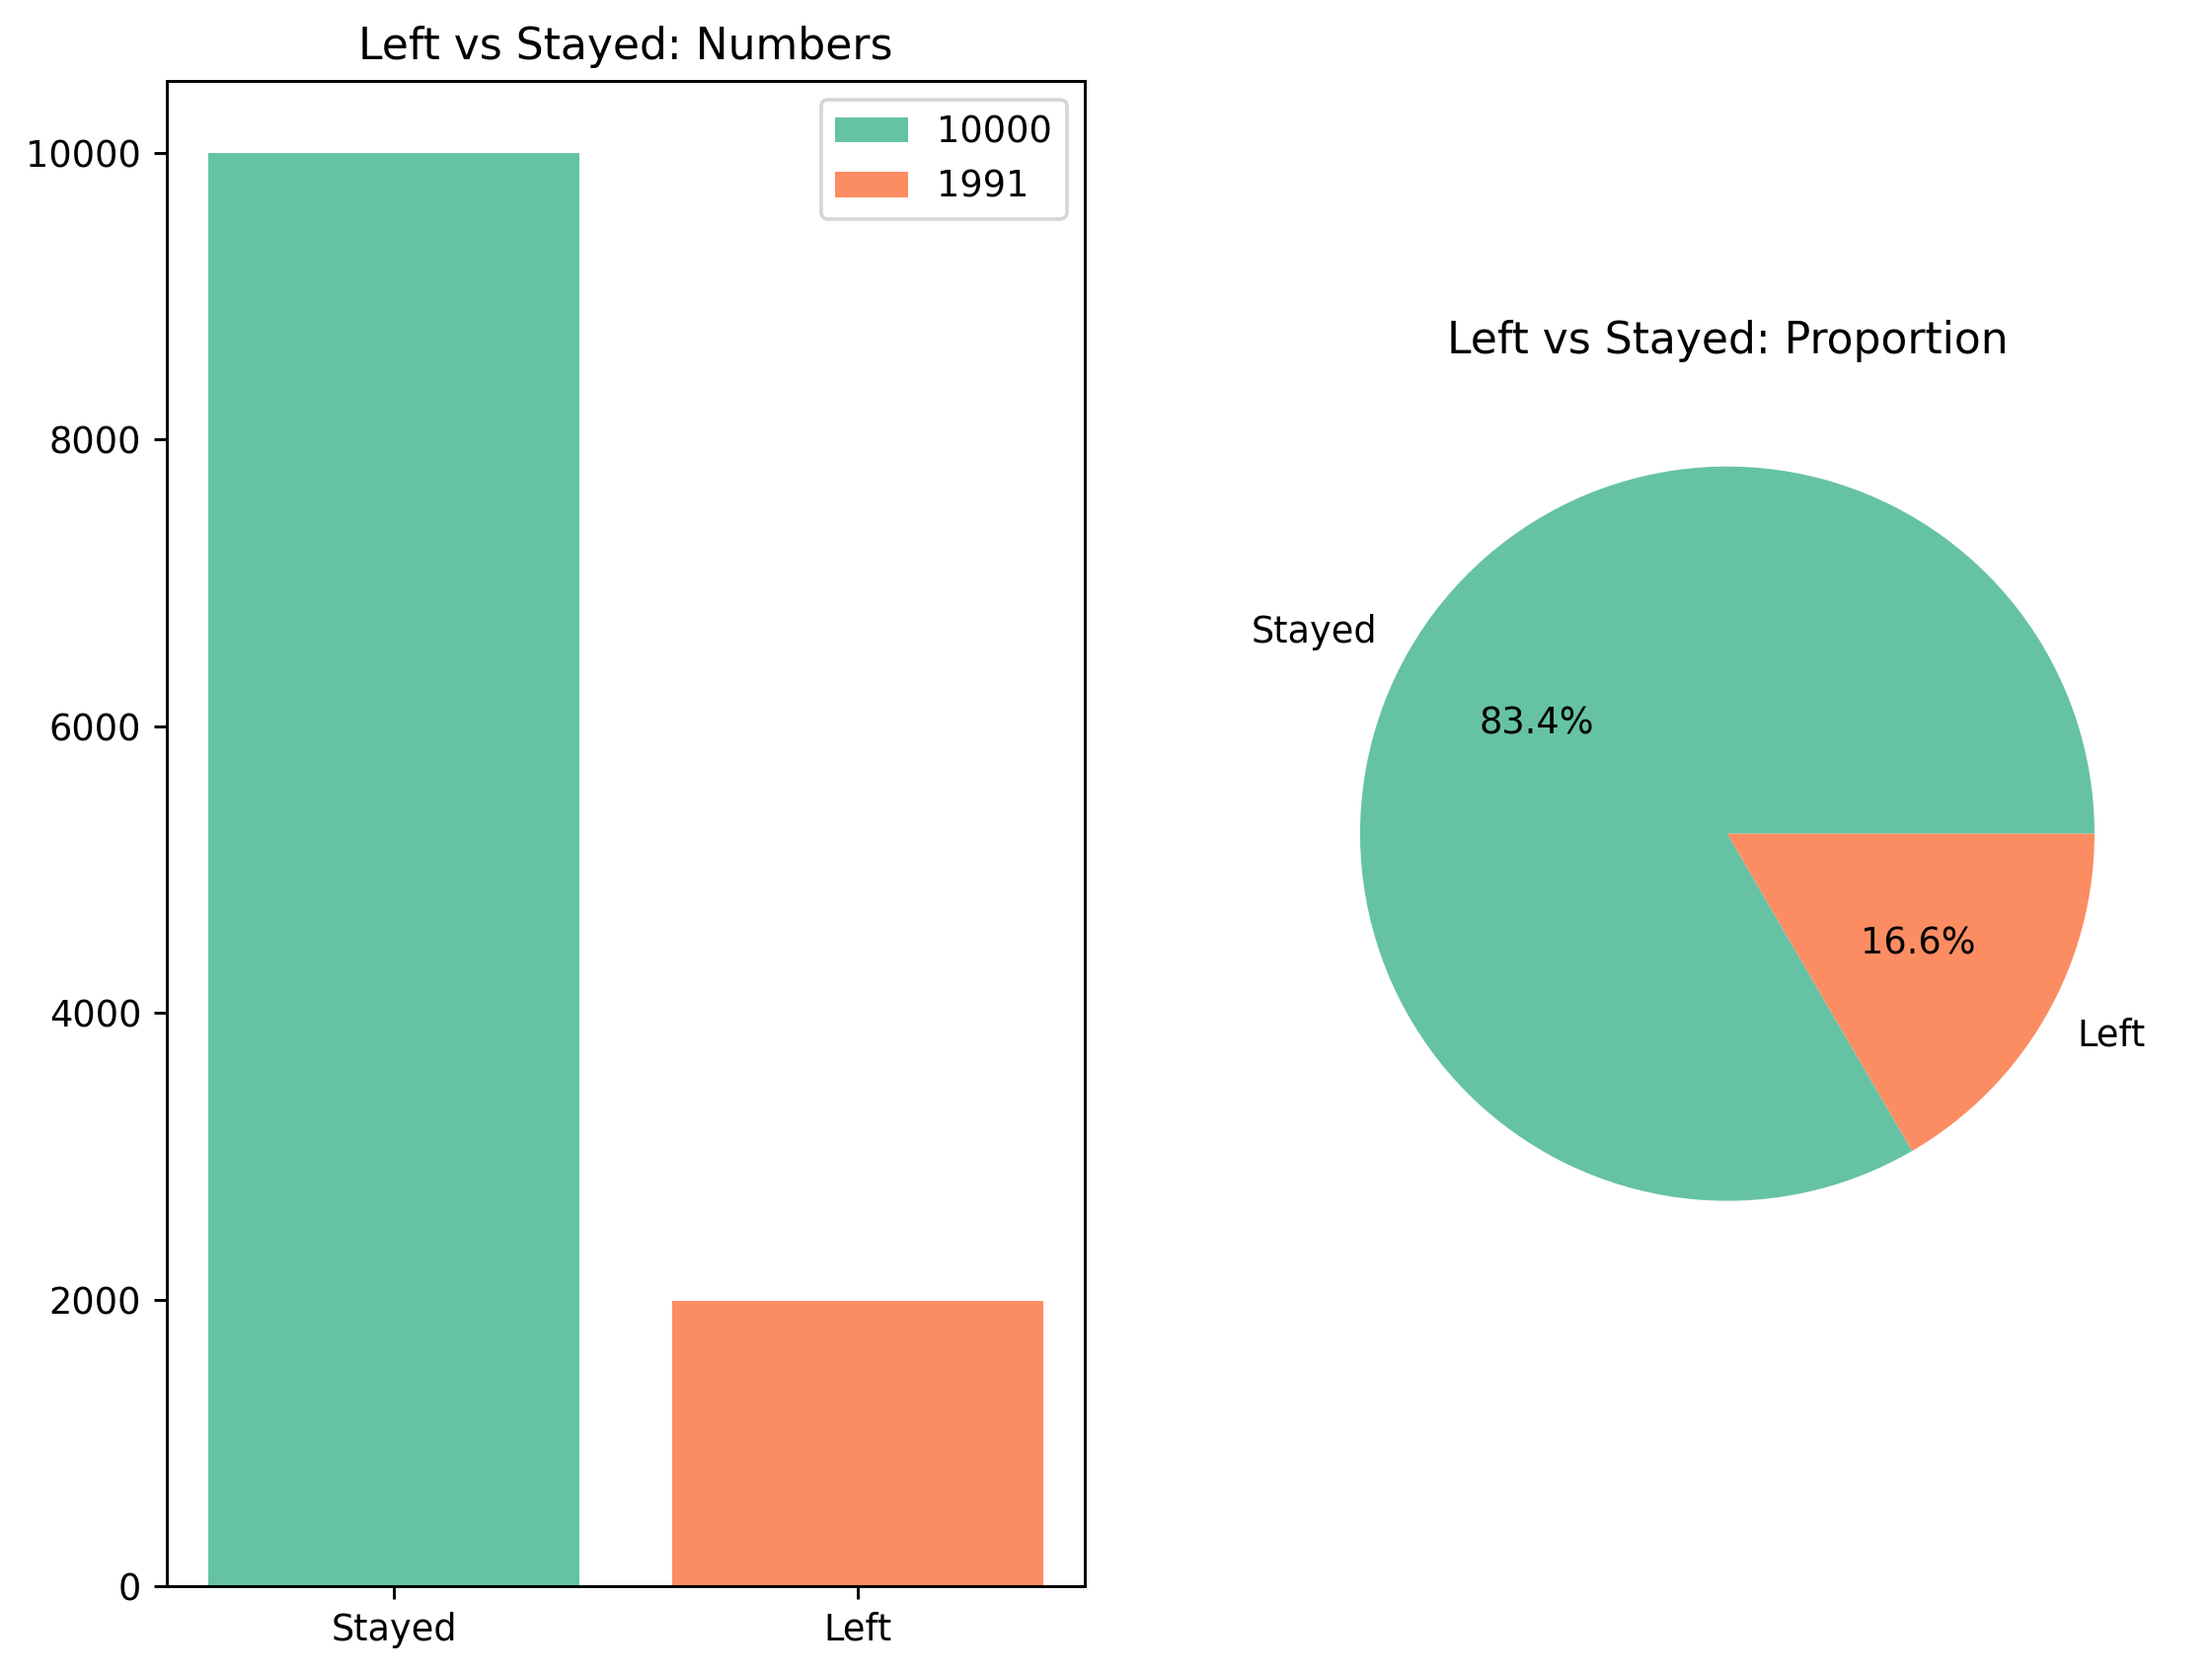

In [10]:
plt.figure()
# Left vs Stayed: by Numbers
plt.subplot(121)
plt.title("Left vs Stayed: Numbers")
fig1_x = ["Stayed", "Left"]
fig1_y = df['left'].value_counts()
plt.bar(fig1_x[0],fig1_y[0]); plt.bar(fig1_x[1],fig1_y[1])
plt.legend(fig1_y)
# Left vs Stayed: by Proportion
plt.subplot(122)
df['left'].value_counts(normalize=True).plot.pie(title="Left vs Stayed: Proportion", labels=fig1_x, ylabel='', autopct='%1.1f%%')
plt.show()

Now let's explore whether this 16.6% attrition rate is consistent across departments.

**Employee Retention by Department**

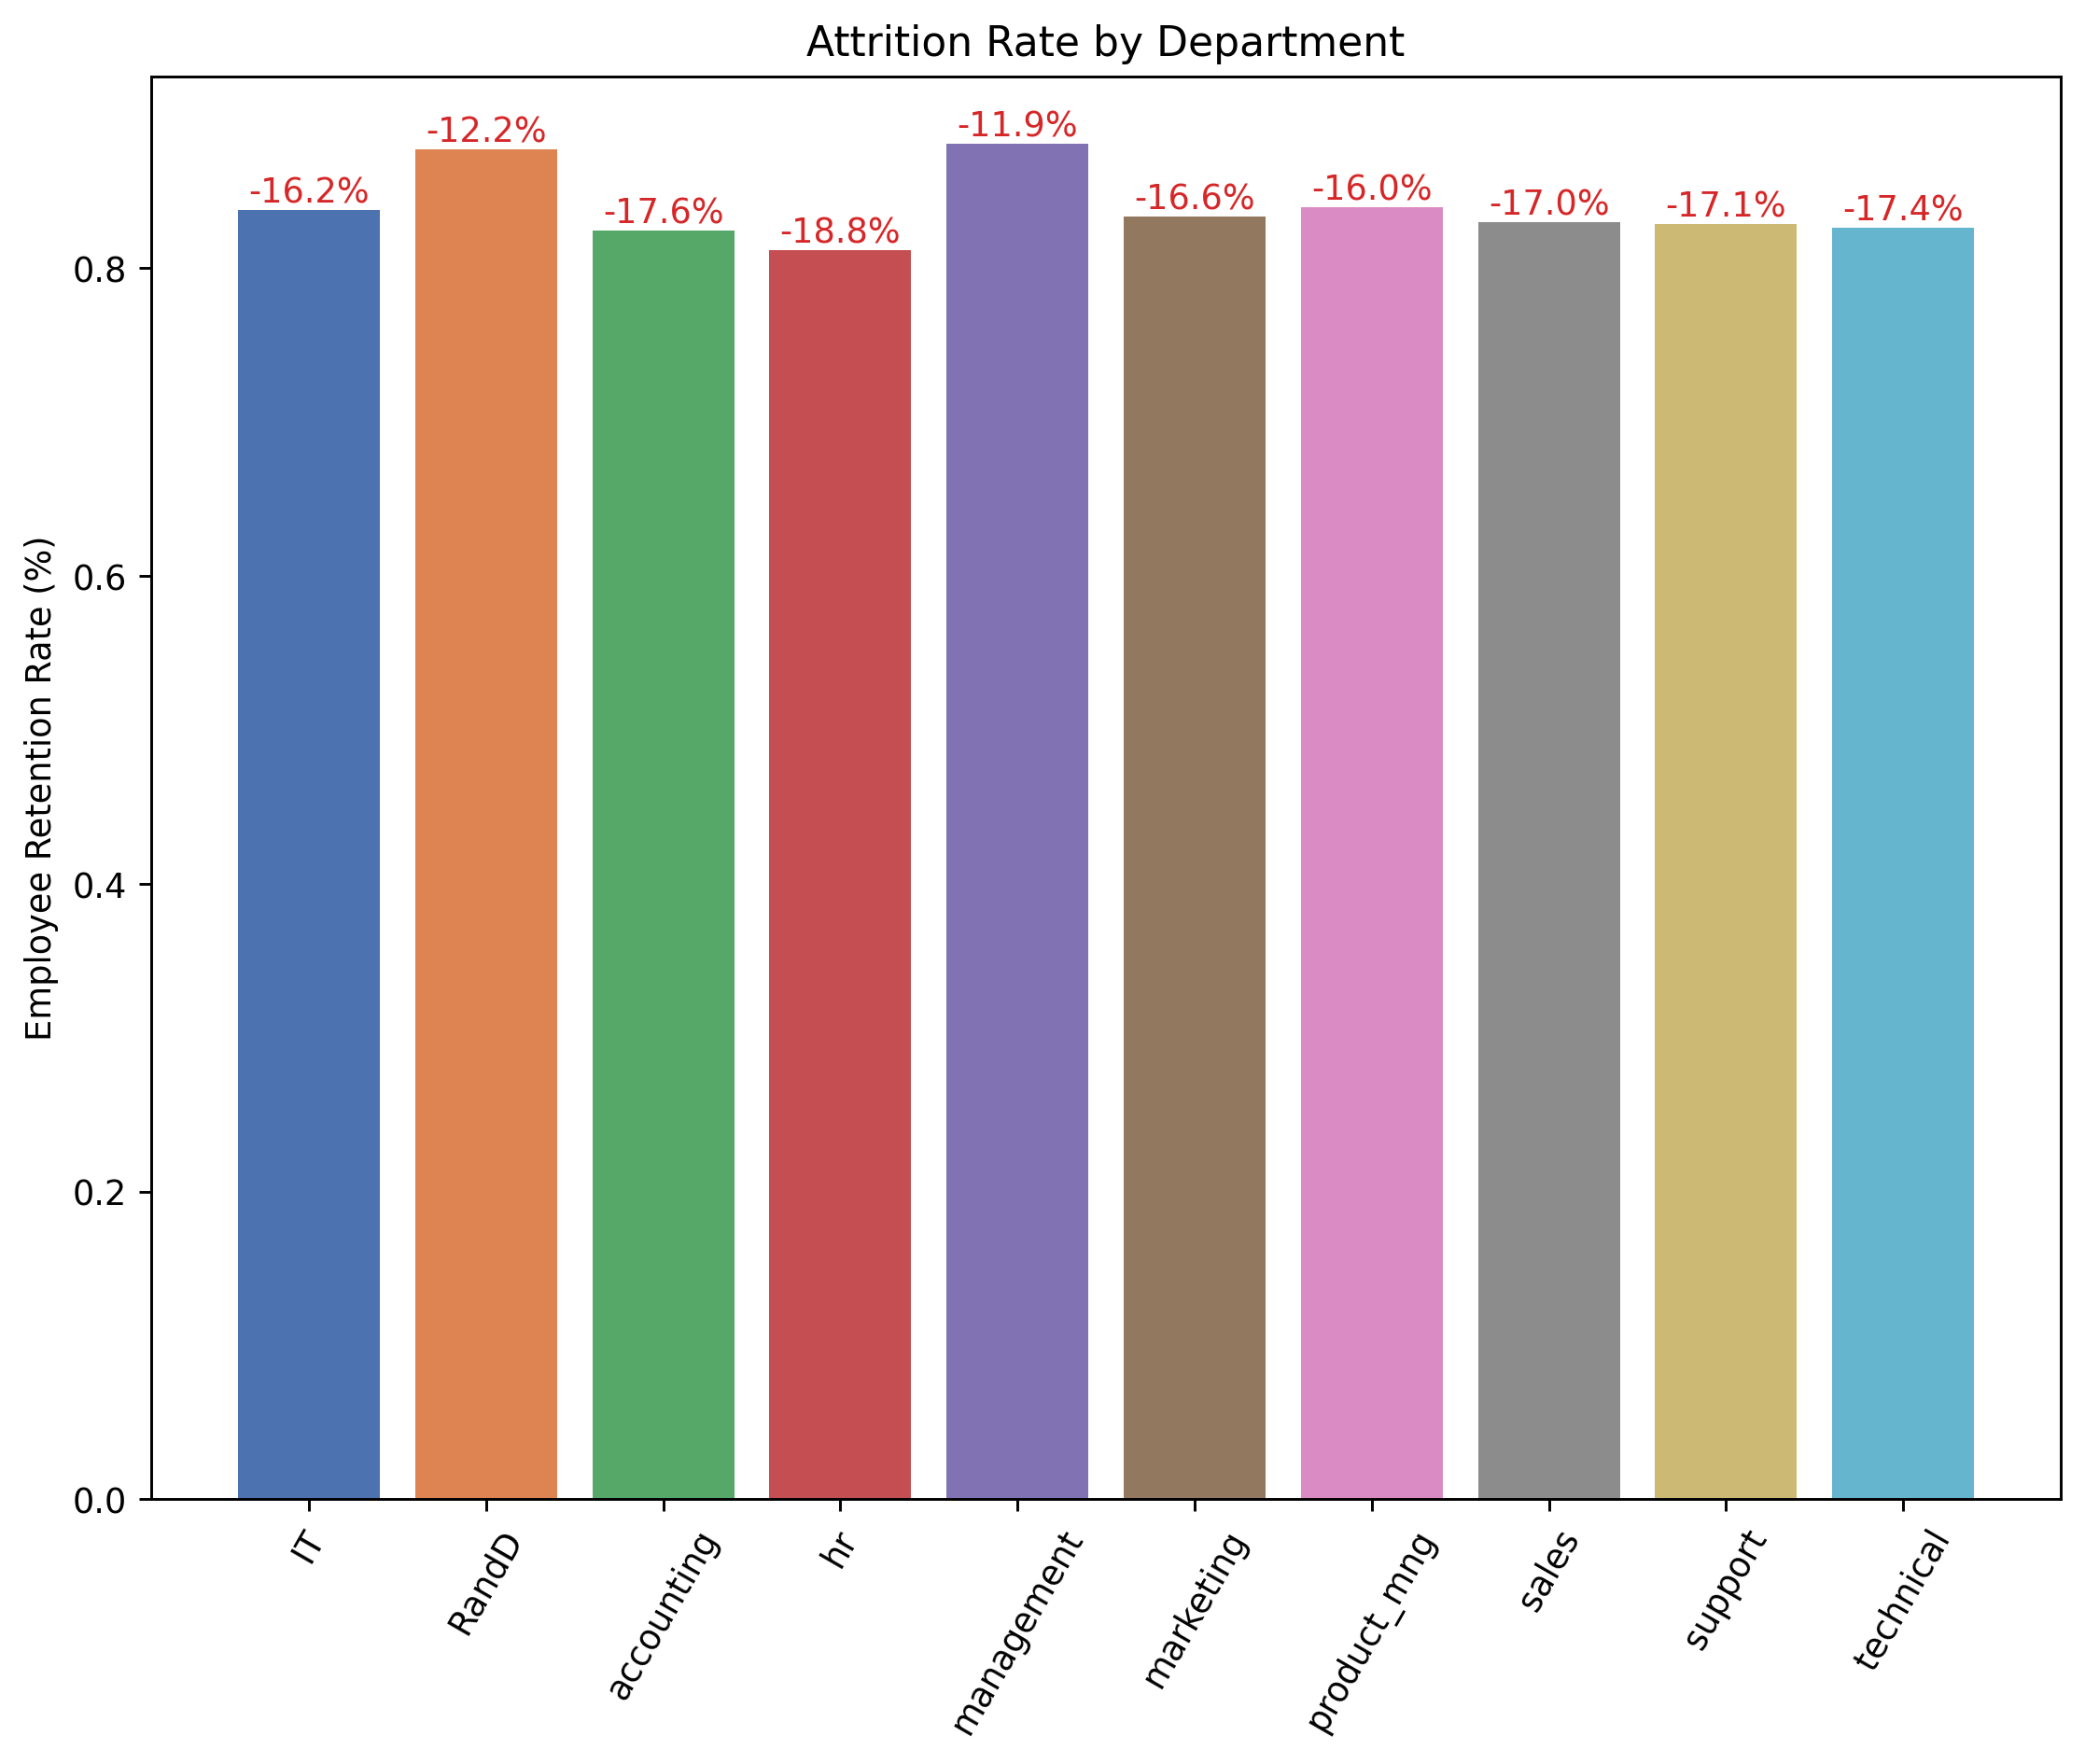

In [11]:
# Retention rate by department
retention_by_dept = df.groupby('department')['left'].value_counts(normalize=True).reset_index()

plt.figure()
plt.title('Attrition Rate by Department')
fig2_data = retention_by_dept[retention_by_dept['left']==0]
attrition_by_dept = (fig2_data.proportion.to_numpy() - 1) * 100
plt.bar_label(plt.bar(fig2_data.department, fig2_data.proportion), [f'{i:.1f}%' for i in attrition_by_dept], color='tab:red')
plt.bar(fig2_data.department, fig2_data.proportion, color=sns.color_palette("deep"))
plt.ylabel('Employee Retention Rate (%)'); plt.xticks(rotation=60); plt.show()

There seems to be a significant difference in attrition rates among certain departments.

Just to be sure, let's do a hypothesis test to evaluate whether the proportion of employees who left differs across departments significantly. I am choosing to perfom the Chi-Squared Test of Independence.

**Hypothesis Testing**

The Chi-Squared Test of Independence is the most suitable for this scenario. Here's why:

1. Both 'department' and 'left' are categorical variables.
2. We want to test whether the distribution of attrition (left) is independent of the department an employee belongs to.

This test will help us determine whether there is a relationship (or association) between an employee's department and their likelihood of leaving the company.

Null Hypothesis ($H_0$): There is no significant difference in attrition rates across different departments.

Alternative Hypothesis ($H_1$): There is a significant difference in attrition rates across different departments.

In [12]:
# Let's perform the test at a 95% confidence level.

dept_data = df.groupby('department')['left'].value_counts().reset_index()

# Create contingency table using counts
contingency_table = pd.crosstab(dept_data["department"], dept_data["left"], values=dept_data["count"], aggfunc="sum")

# Performing the chi-square test
chi2, pval, degrees_of_freedom, expected = stats.chi2_contingency(contingency_table)

# Printing results
print(f"\nChi-Square Test p-value: {pval}")
if pval < 0.05:
    print("\nThere is a significant difference in attrition rates across different departments (reject H0)\n")

else:
    print("\nThere is no significant difference in attrition rates across different departments (fail to reject H0)\n")


Chi-Square Test p-value: 0.01329832963300122

There is a significant difference in attrition rates across different departments (reject H0)



As I suspected, there is a significant difference between the attrition rate across departments.

Let's explore the correlation between all the different variables to guide our analysis further. Correlation does not imply causation. Nonetheless, it would be interesting to look at the patterns and relationships between all the different variables.

**Correlation Heat map**

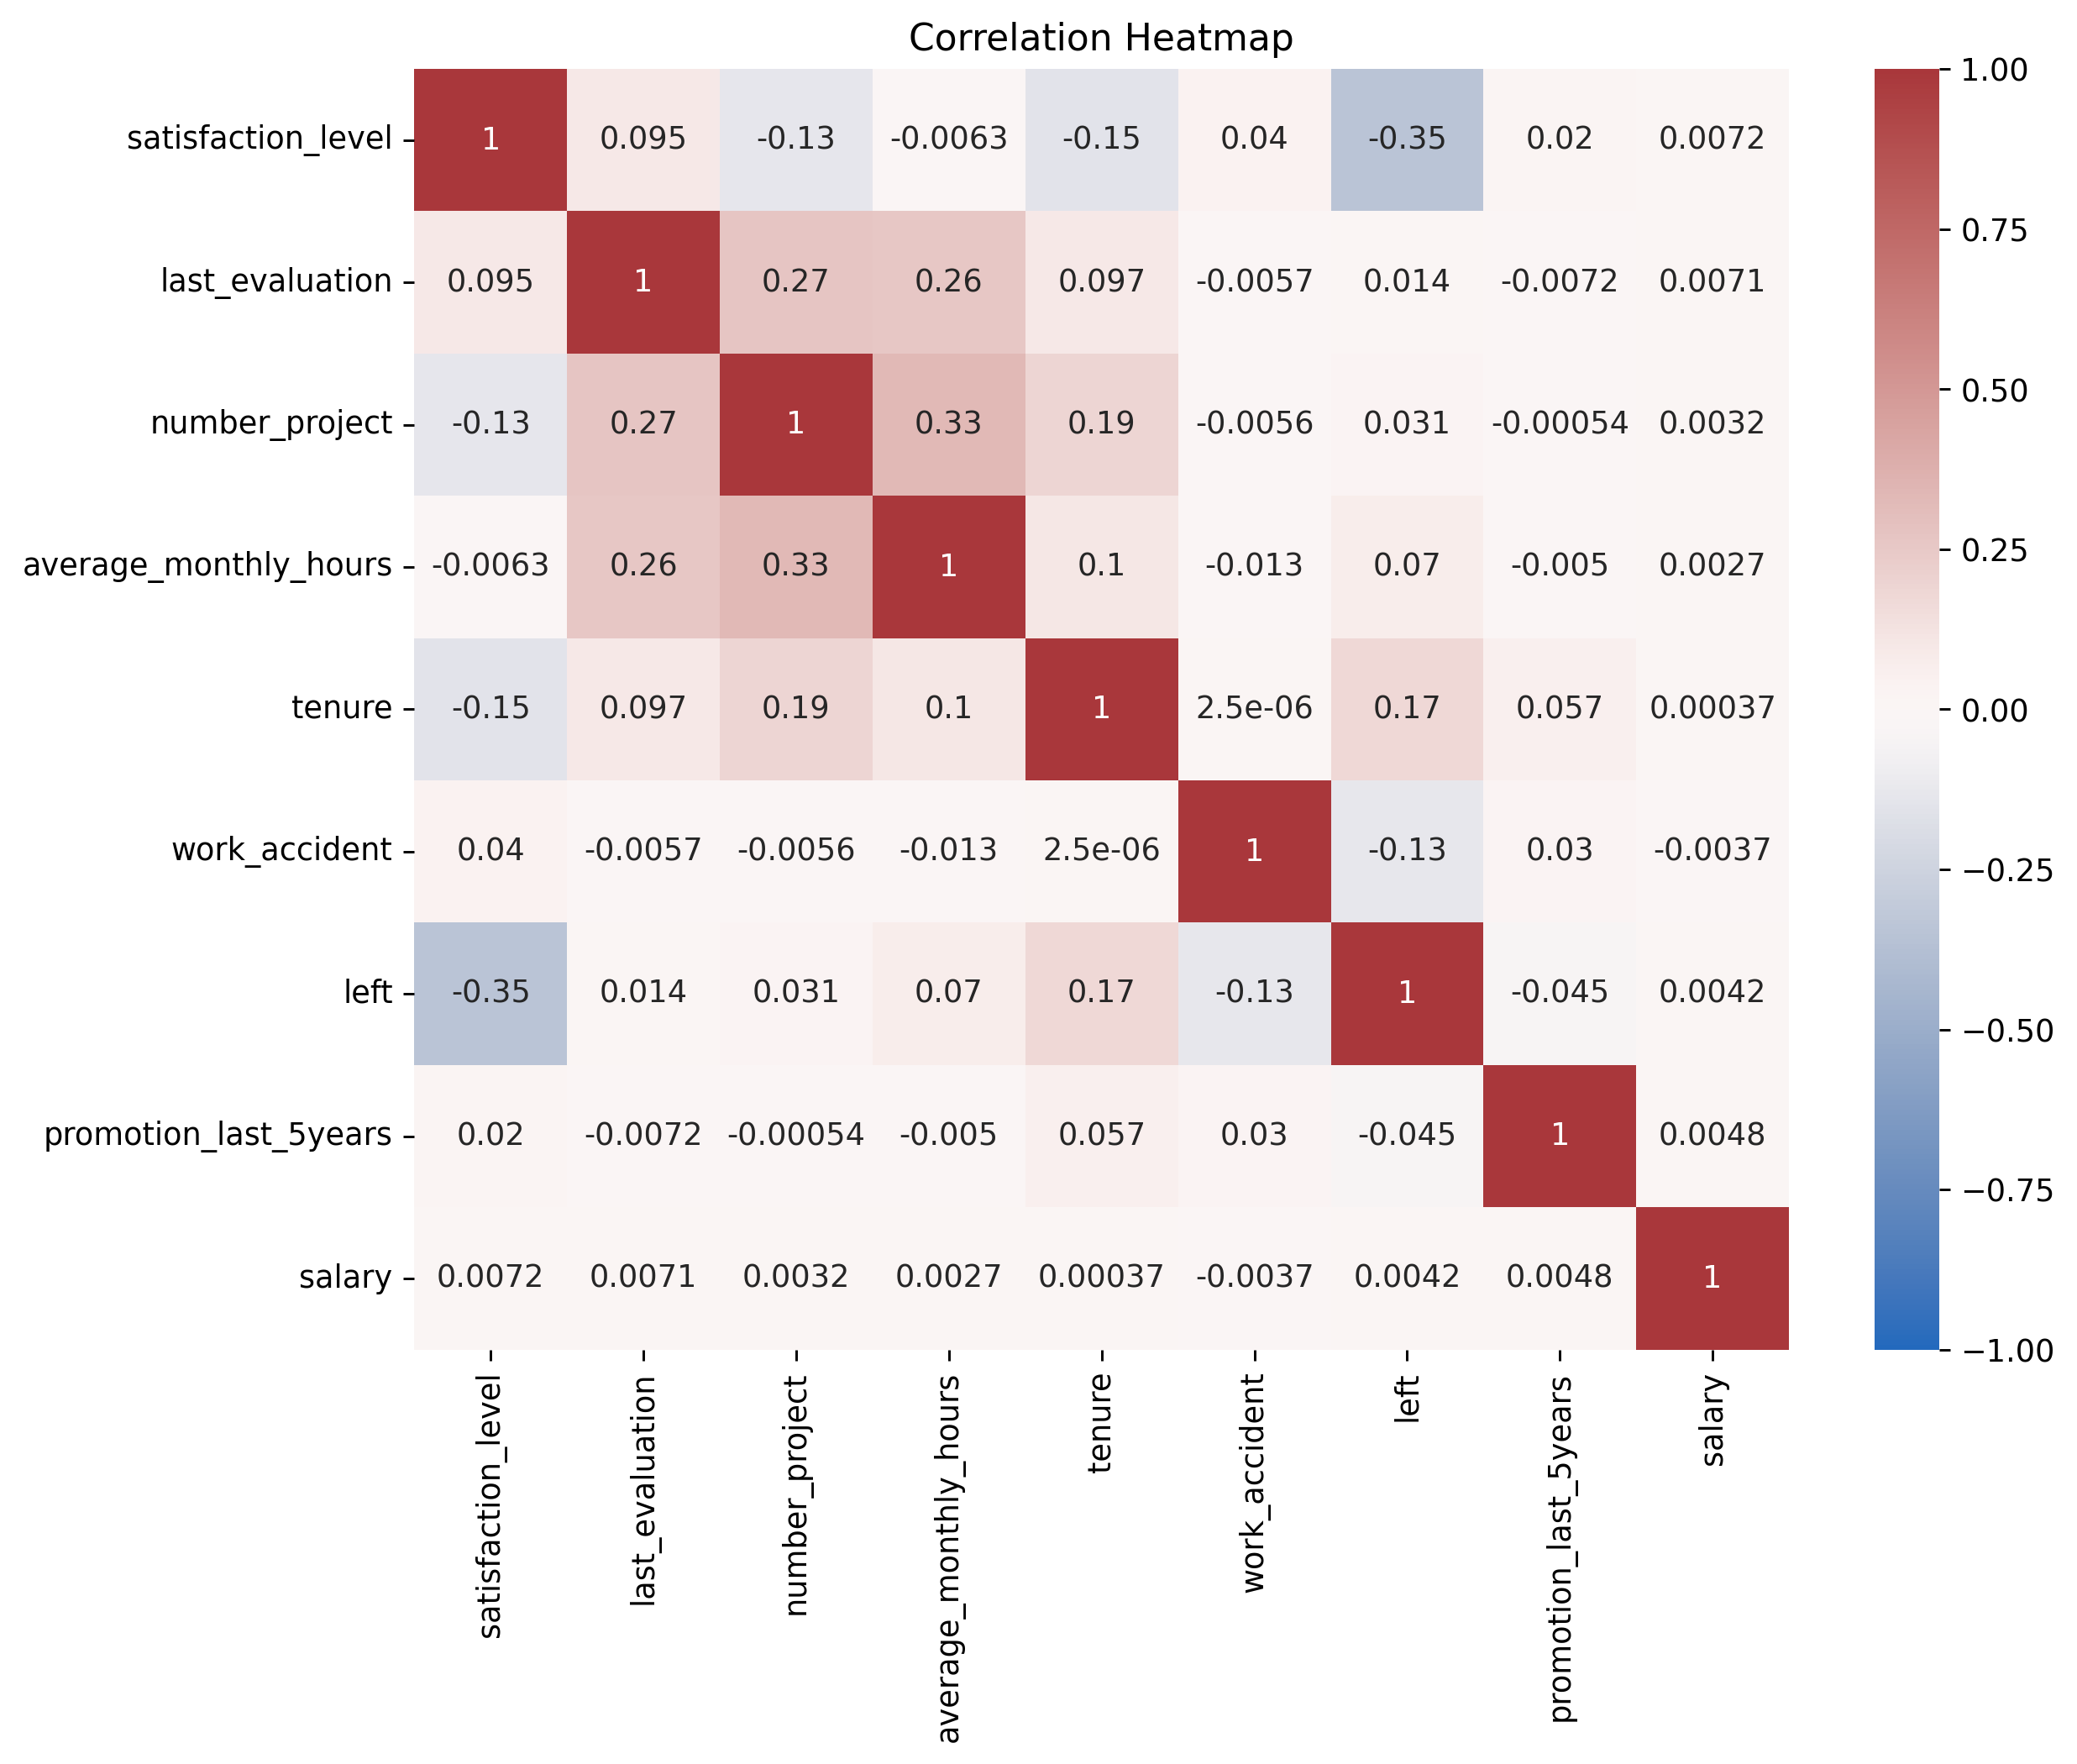

In [13]:
# Encoding categorical variable salary
en_df = df.copy()
salary_encoder = LabelEncoder()
salary_encoder.fit(en_df['salary'])
en_df['salary'] = salary_encoder.transform(en_df['salary'])

# Excluding "department" from the correlation heat map
en_df = en_df.drop('department', axis=1)

# Correlation Heat map
plt.figure()
plt.title("Correlation Heatmap")
sns.heatmap(en_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.show()

The correlation heat map shows that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other; and whether an employee leaves is negatively correlated with their satisfaction level, i.e. employees with higher satisfaction are less likely to leave.

The heatmap also suggests that employee satisfaction is more strongly correlated with factors like work evaluation scores and number of projects than with salary.

To better understand the relationships between all these factors, I am going to explore all these relationships one by one.

Let's start with salary.

**Employee Retention by Salary**

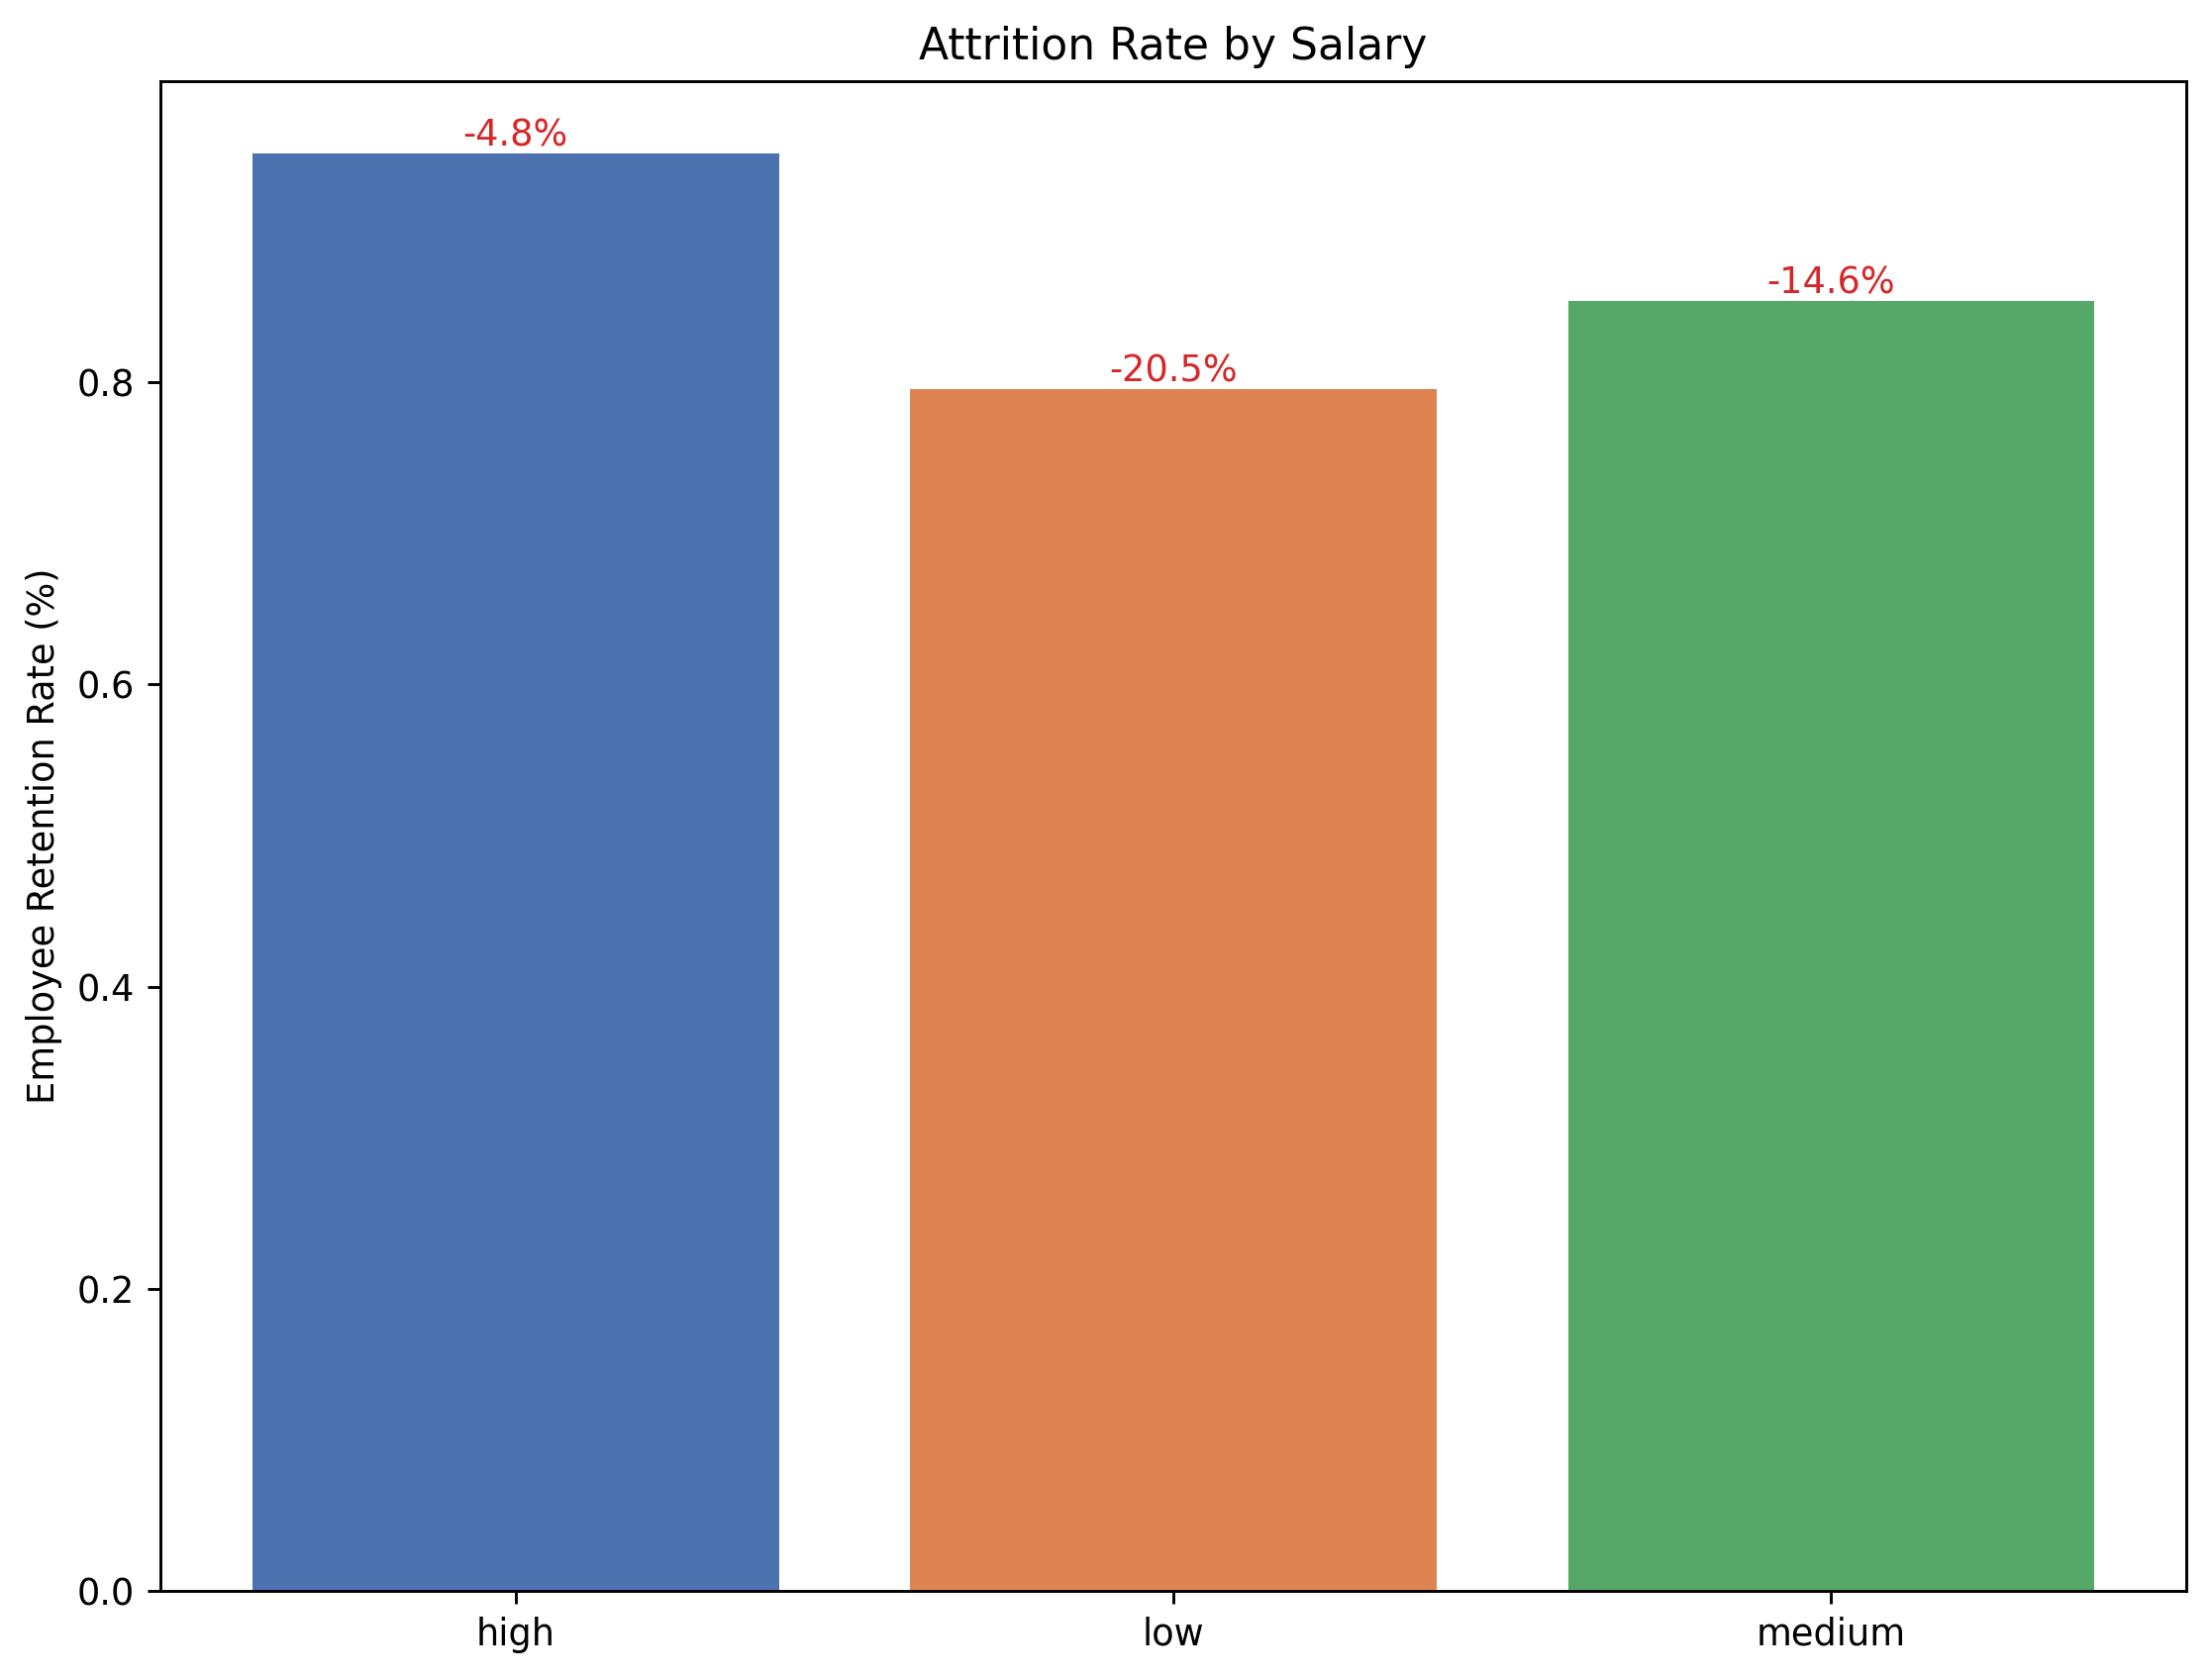

In [14]:
# Retention rate by salary

retention_by_salary = df.groupby('salary')['left'].value_counts(normalize=True).reset_index()

plt.figure()
plt.title('Attrition Rate by Salary')
fig3_data = retention_by_salary[retention_by_salary['left']==0]
attrition_by_salary = (fig3_data.proportion.to_numpy() - 1) * 100
plt.bar_label(plt.bar(fig3_data.salary, fig3_data.proportion), [f'{i:.1f}%' for i in attrition_by_salary], color='tab:red')
plt.bar(fig3_data.salary, fig3_data.proportion, color=sns.color_palette("deep"))
plt.ylabel('Employee Retention Rate (%)'); plt.show()

Looking at this plot above, I wonder **"Are long-tenured employees disproportionately comprised of higher-paid employees?"**

Let's look into this further.

**Salary and Tenure**

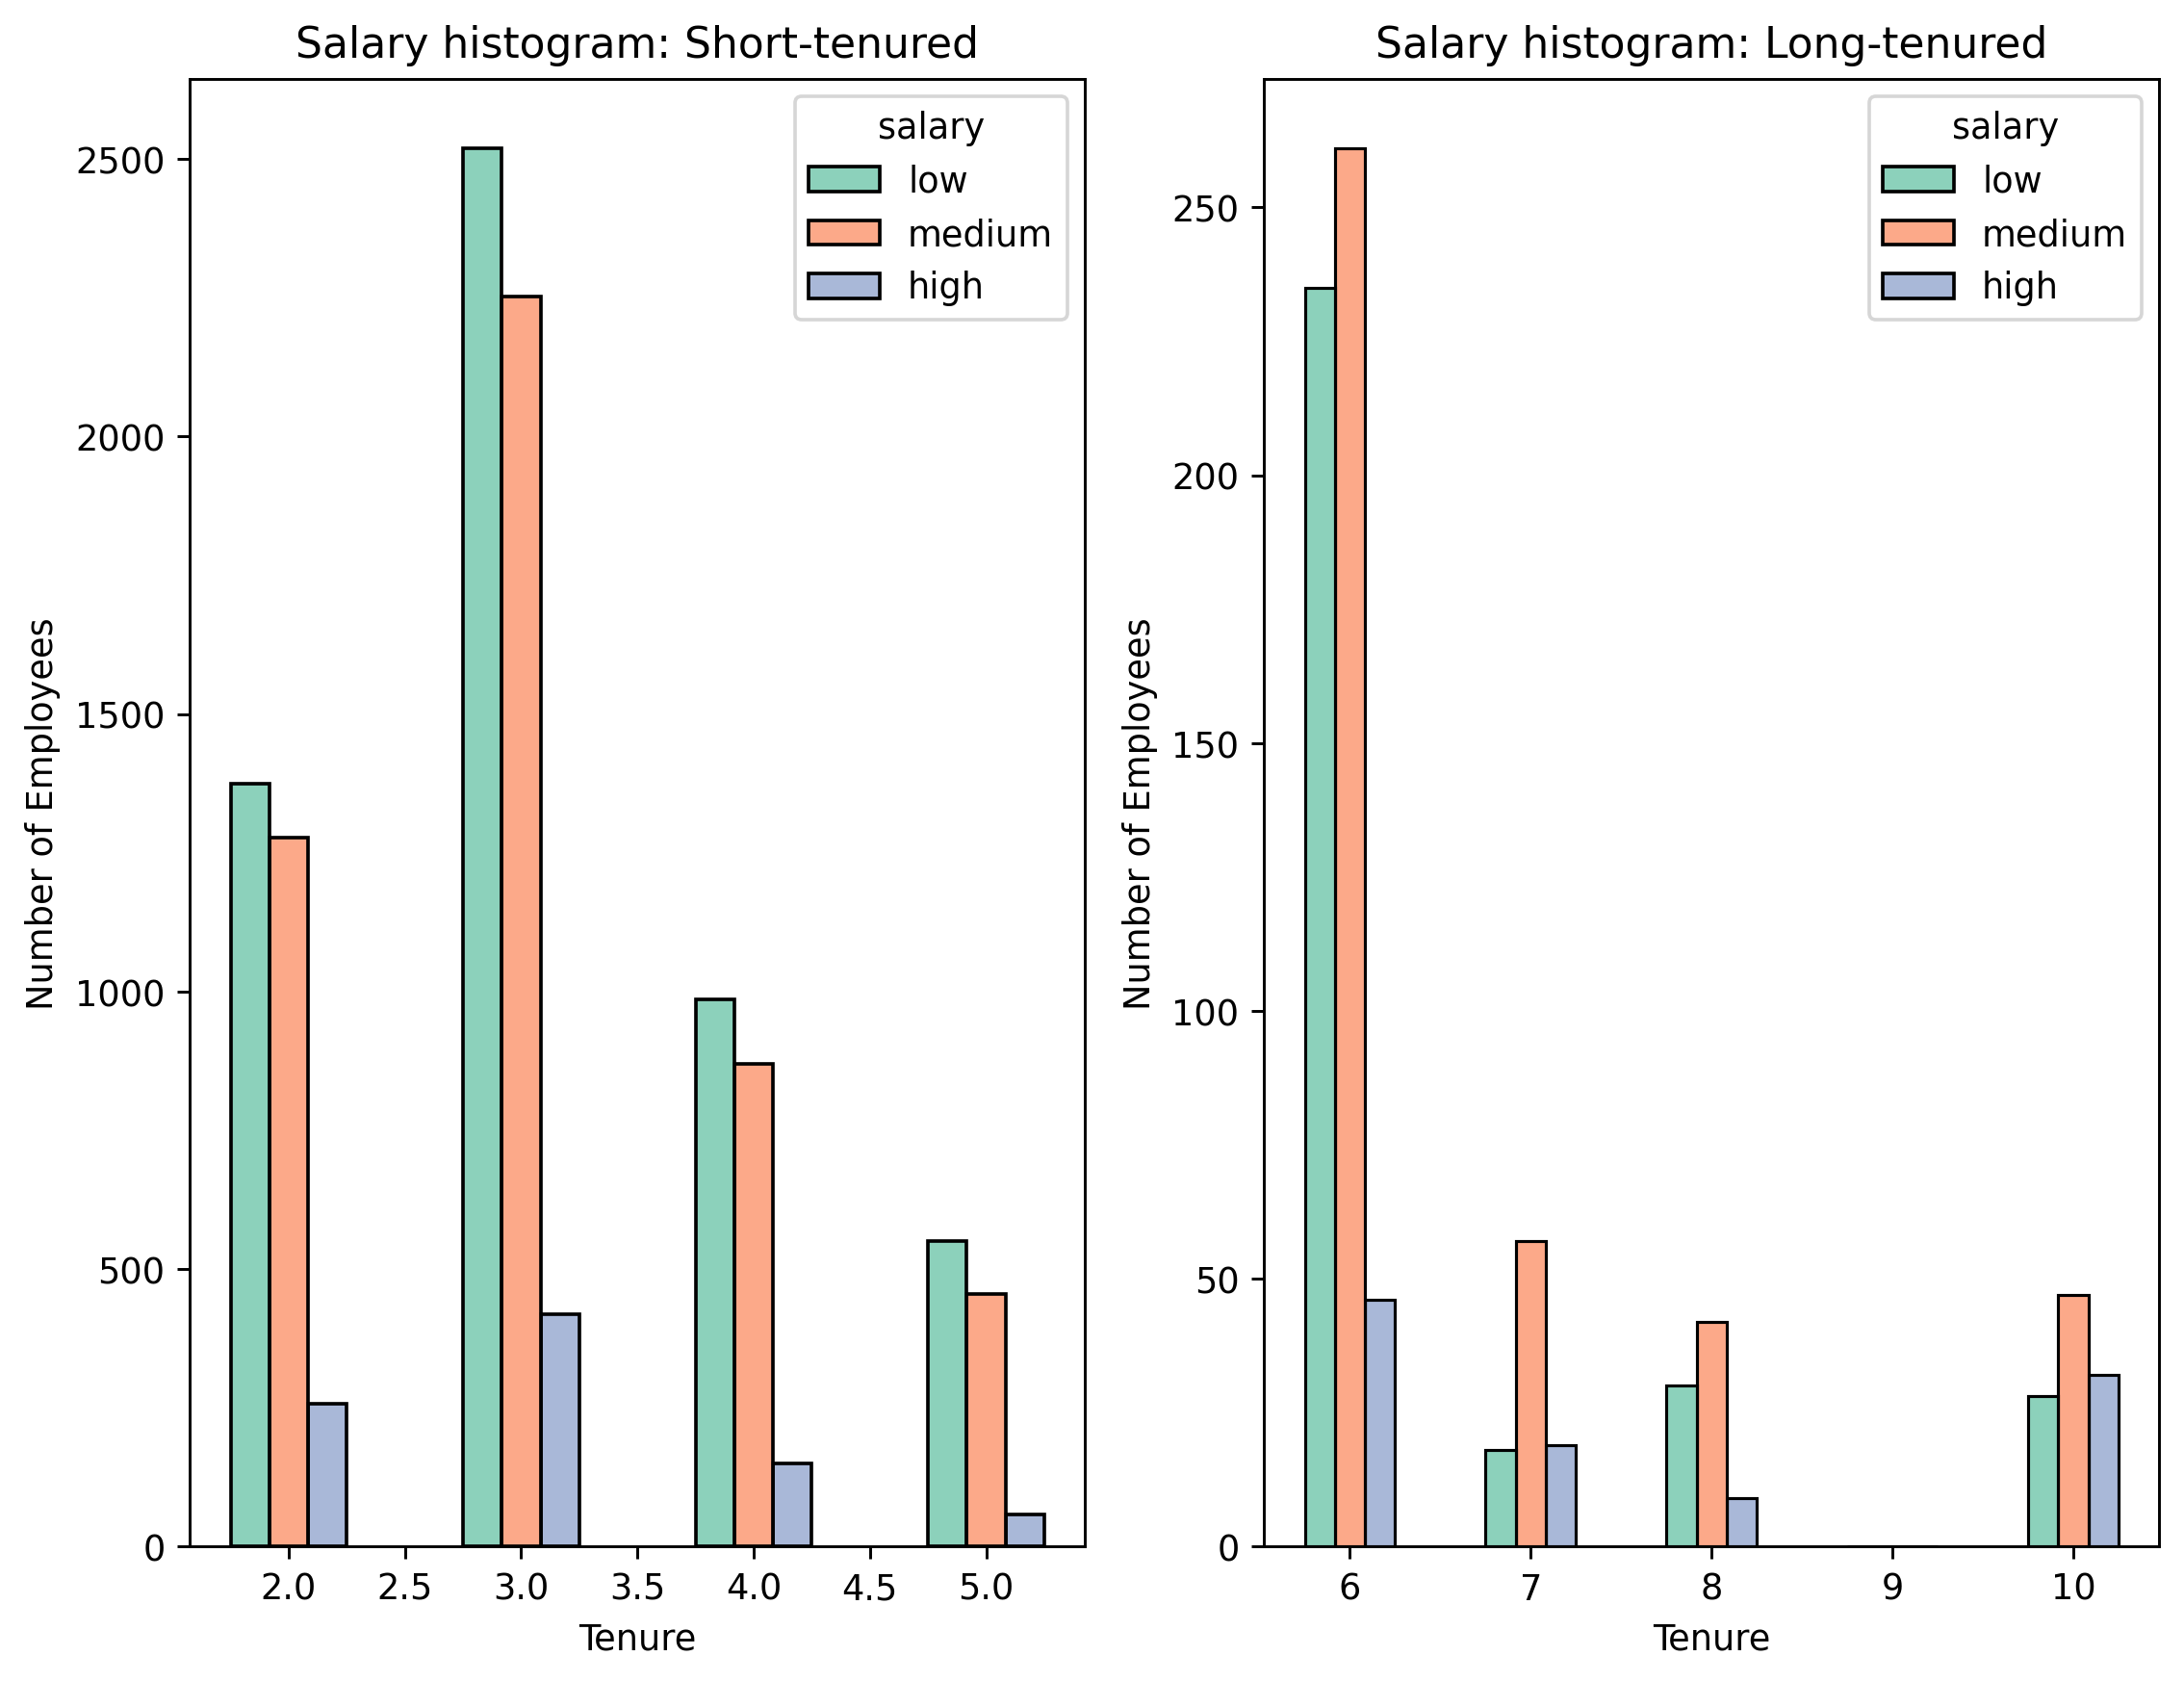

In [15]:
plt.figure()
# short tenure
plt.subplot(121)
plt.title("Salary histogram: Short-tenured")
tenure_short = df[df['tenure'] < upper_limit]
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5)
plt.ylabel("Number of Employees"); plt.xlabel("Tenure")

# long tenure
plt.subplot(122)
plt.title("Salary histogram: Long-tenured")
tenure_long = df[df['tenure'] > upper_limit]
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5)
plt.ylabel("Number of Employees"); plt.xlabel("Tenure"); plt.show()

No, it seems long-tenured employees are not disproportionately comprised of higher-paid employees. It was fun to suspect though.

Next, let's look at satisfaction levels and tenure.

**Satisfaction levels and Tenure**

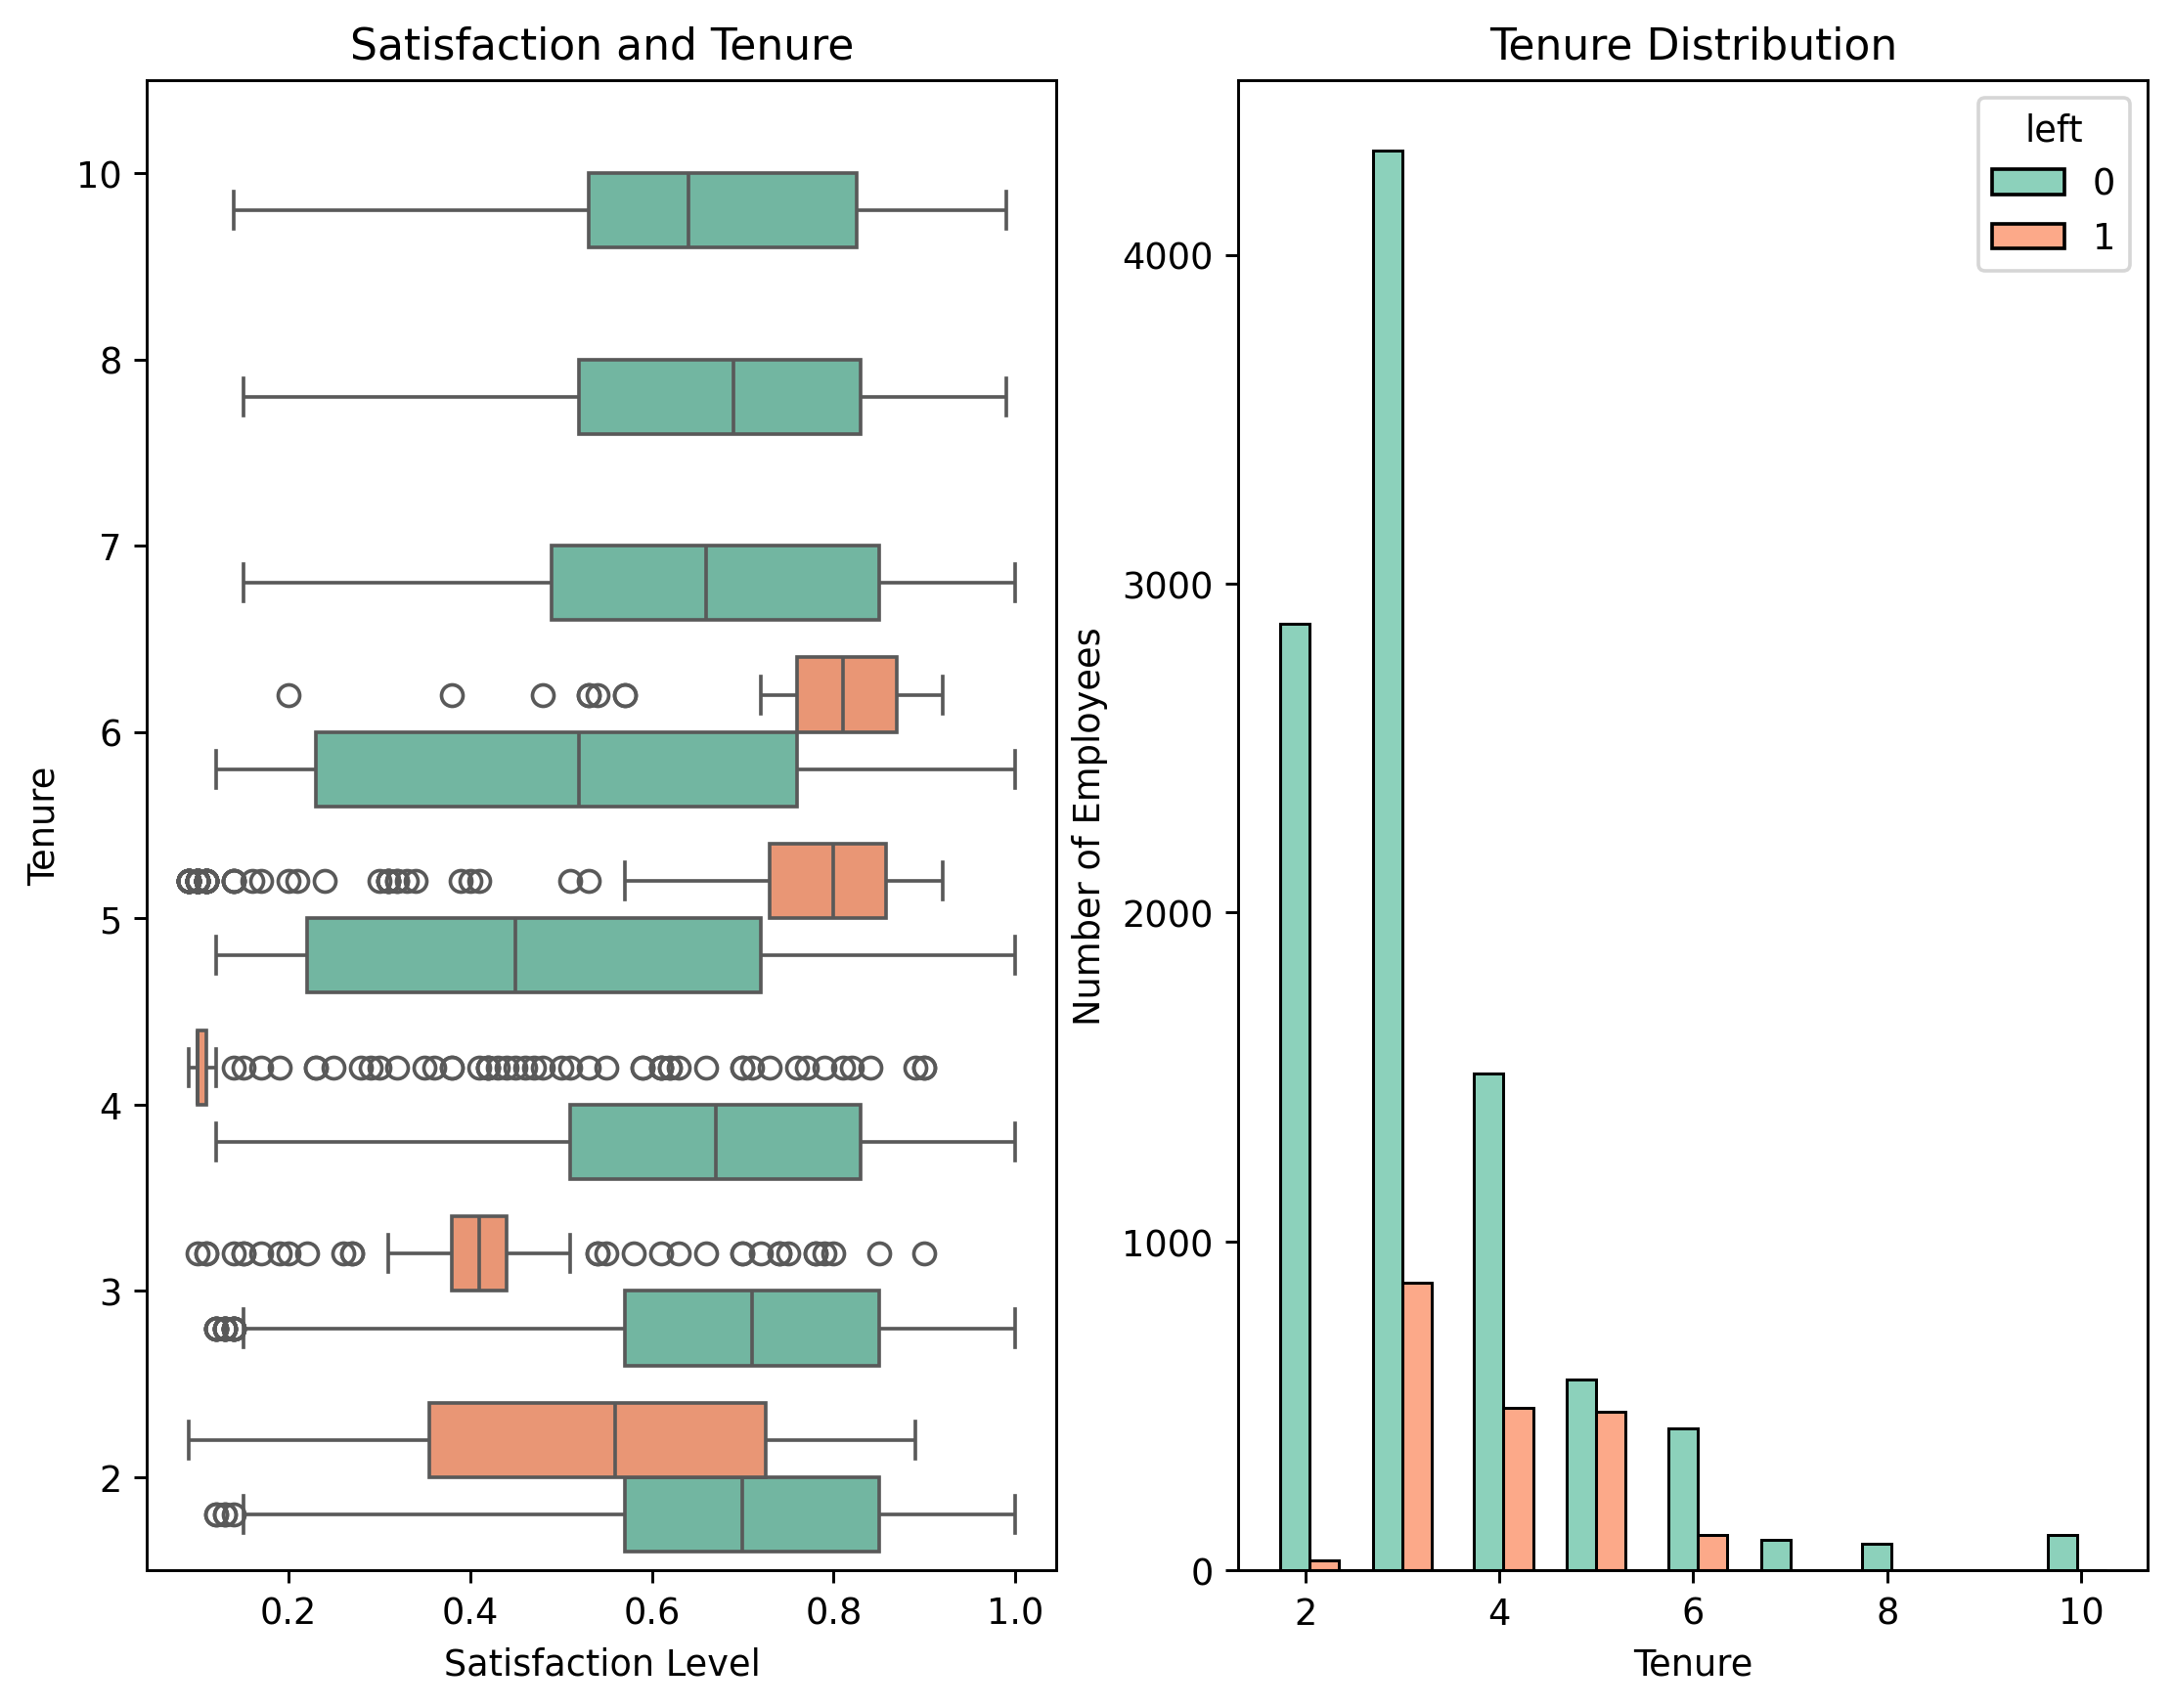

In [16]:
plt.figure()
# satisfaction and tenure
plt.subplot(121)
plt.title("Satisfaction and Tenure")
sns.boxplot(df, x='satisfaction_level', y='tenure', hue='left', orient='h', legend=None).invert_yaxis()
plt.ylabel("Tenure"); plt.xlabel("Satisfaction Level")

# tenure distribution by "left"
plt.subplot(122)
plt.title("Tenure Distribution")
sns.histplot(df, x='tenure', hue='left', multiple='dodge', shrink=7)
plt.ylabel("Number of Employees"); plt.xlabel("Tenure"); plt.show()

The above plot shows:

- Employees who departed (Left = 1) fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

- Four-year employees who left seem to have an unusually low satisfaction level. This needs to be investigated further.

- The longest-tenured (Tenure > 6 years) employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

- The histogram shows that there are relatively few longer-tenured employees. It's possible that they are the higher-ranking, higher-paid employees.

**Average Monthly Hours and Number of Projects**

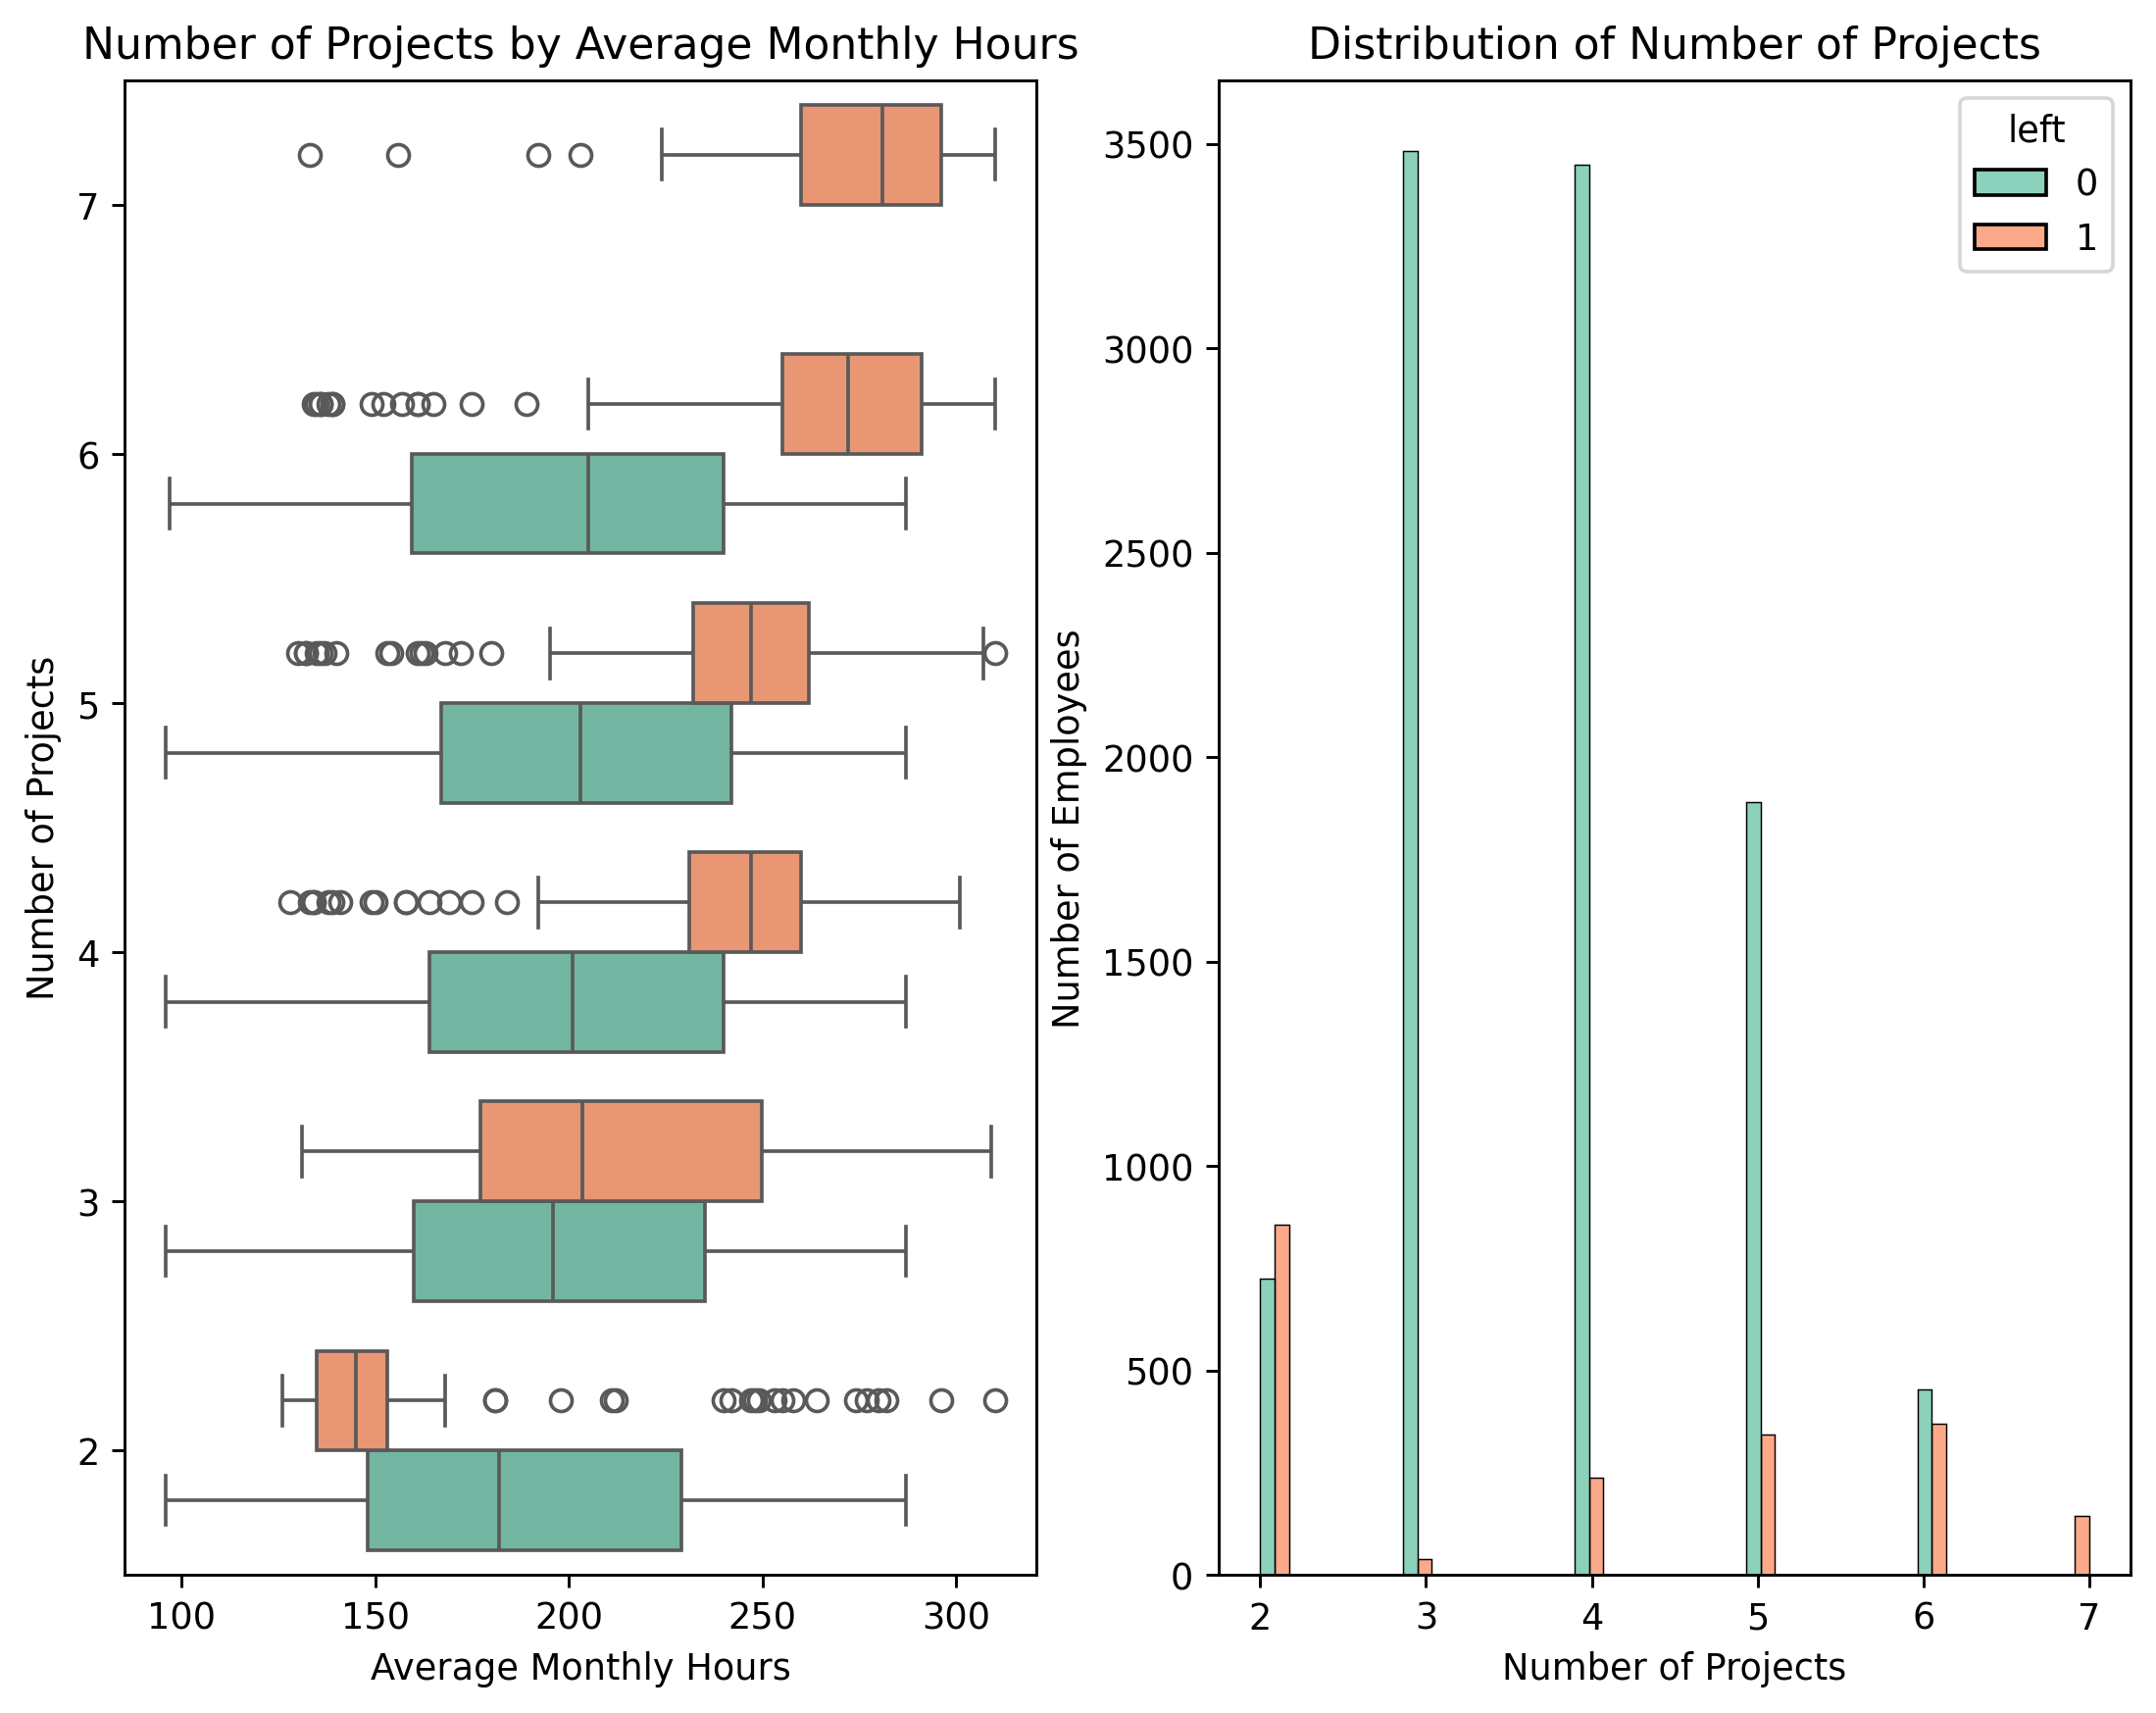

In [17]:
plt.figure()
plt.subplot(121)
sns.boxplot(df, x='average_monthly_hours', y='number_project', hue='left', orient='h', legend=None).invert_yaxis()
plt.title("Number of Projects by Average Monthly Hours")
plt.xlabel("Average Monthly Hours"); plt.ylabel("Number of Projects")

# distribution of number of projects
plt.subplot(122)
plt.title("Distribution of Number of Projects")
sns.histplot(df, x='number_project', hue='left', multiple='dodge')
plt.xlabel("Number of Projects"); plt.ylabel("Number of Employees"); plt.show()

Wow! Three things in the figure above immediately caught my eye.

- Firstly, as we move up the boxplot (on the left), the boxes shift to the right -- i.e. the employees who handled more projects also logged more working hours.

I admit that this is hardly a surprising insight, now before you go "duh!", let me confirm the second thing:

In [18]:
# employees who worked on 7 projects
df[df['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

- Everyone who handled 7 projects left -- all 145 of them.

Which brings me to the third thing:

- of the employees who handled 4 or more projects, the ones who left tended to be those who worked the longest hours. These individuals were probably the ones who contributed the most to their respective projects.

The optimal number of projects for the employee to handle seems to be 3-4.

A few other things to note from the figure above:

- There is also another group of employees who worked considerably less than their colleagues with the same number of projects. It is possible that of these people who stayed were maybe granted special accommodations, and the ones who left were probably fired or had already handed in their notice.

- Most employees seem to be working unreasonably long hours. Even the ones who didn't leave are working around 200 hours per month on average.

Let's look into this further.

Assuming 37.5 hour work week (M - F) and 2 weeks of vacation every year:

In [19]:
expected_monthly_hours = (52-2)*37.5/12
print(f"Employees are expected to work {expected_monthly_hours} hours every month.")

Employees are expected to work 156.25 hours every month.


Let's look at how much these employees are working every month:

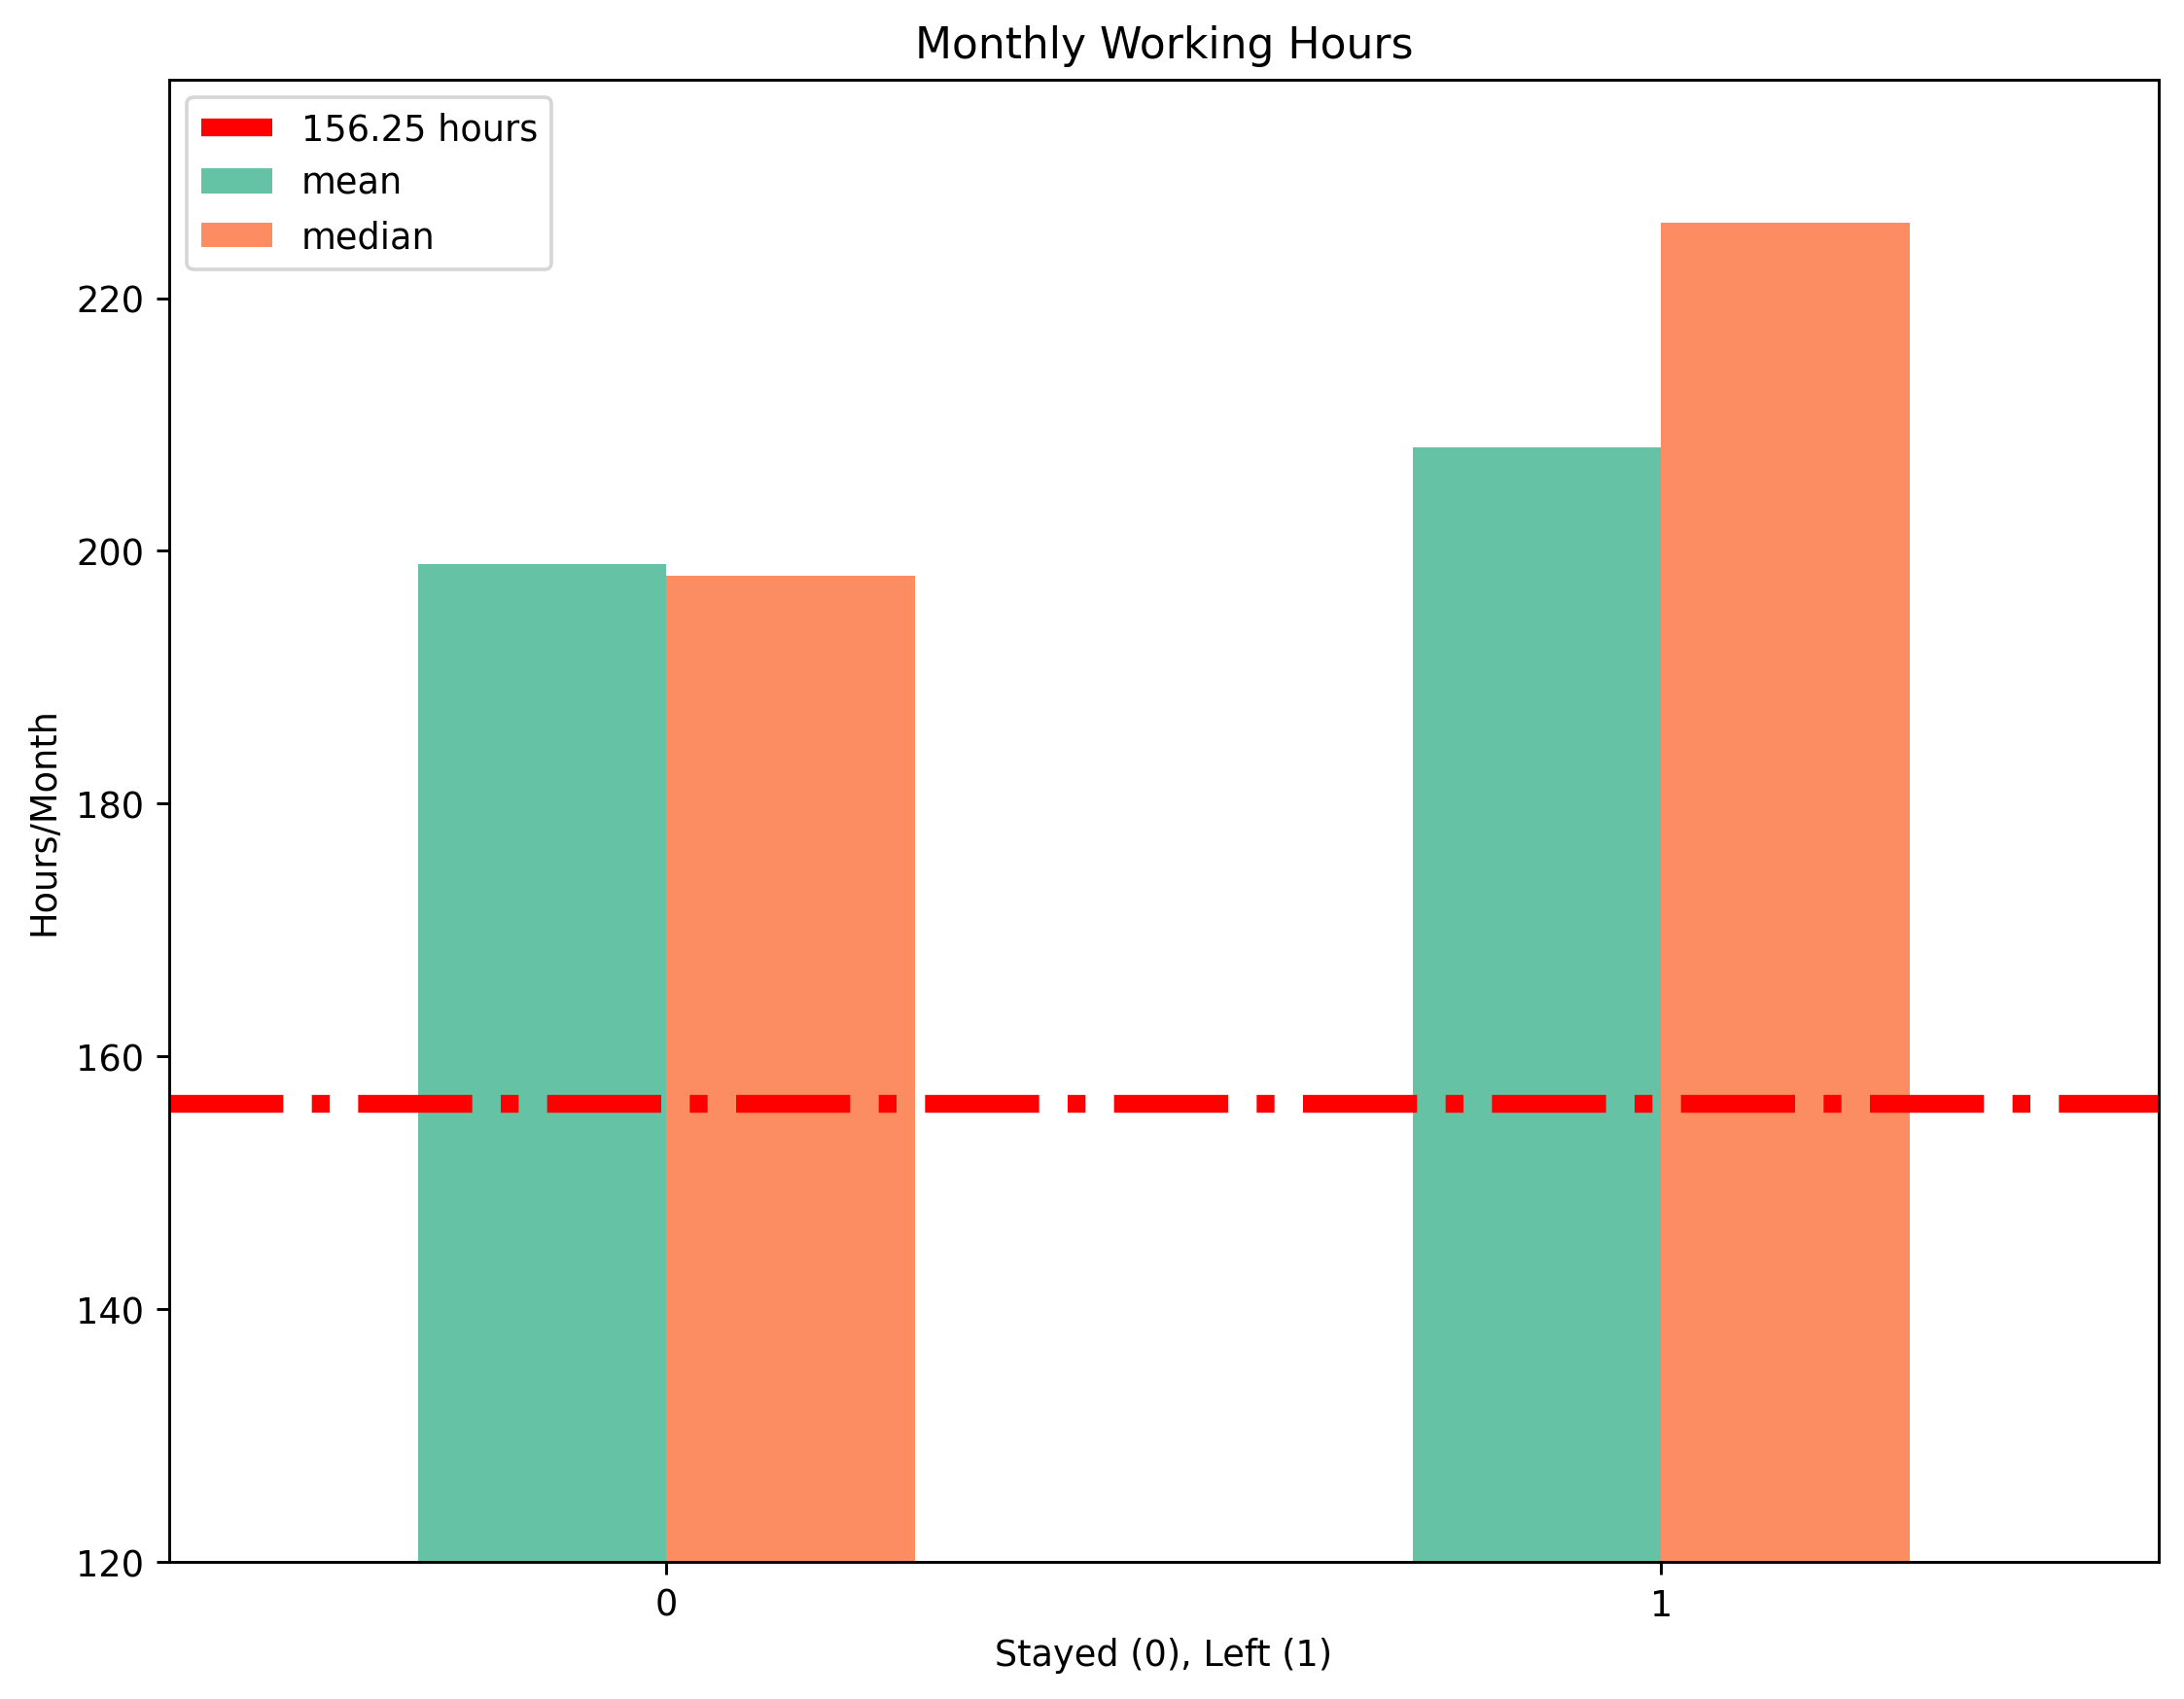

In [20]:
df.groupby(['left'])['average_monthly_hours'].agg(["mean","median"]).plot.bar()
plt.axhline(expected_monthly_hours, color="red", lw=5, ls='-.', label=f"{expected_monthly_hours} hours")
plt.title("Monthly Working Hours"); plt.xlabel("Stayed (0), Left (1)"); plt.ylabel("Hours/Month")
plt.ylim(120,); plt.xticks(rotation=0); plt.legend(); plt.show()

In the bar plot above, the red line show the number of hours the employees would typically be expected to work every month. The bars show the actual work hours of the employees.

Even the employees who are choosing to stay are well above the red line (156.25 hours).

**Satisfaction Levels and Evaluation Scores by Average Monthly Hours**

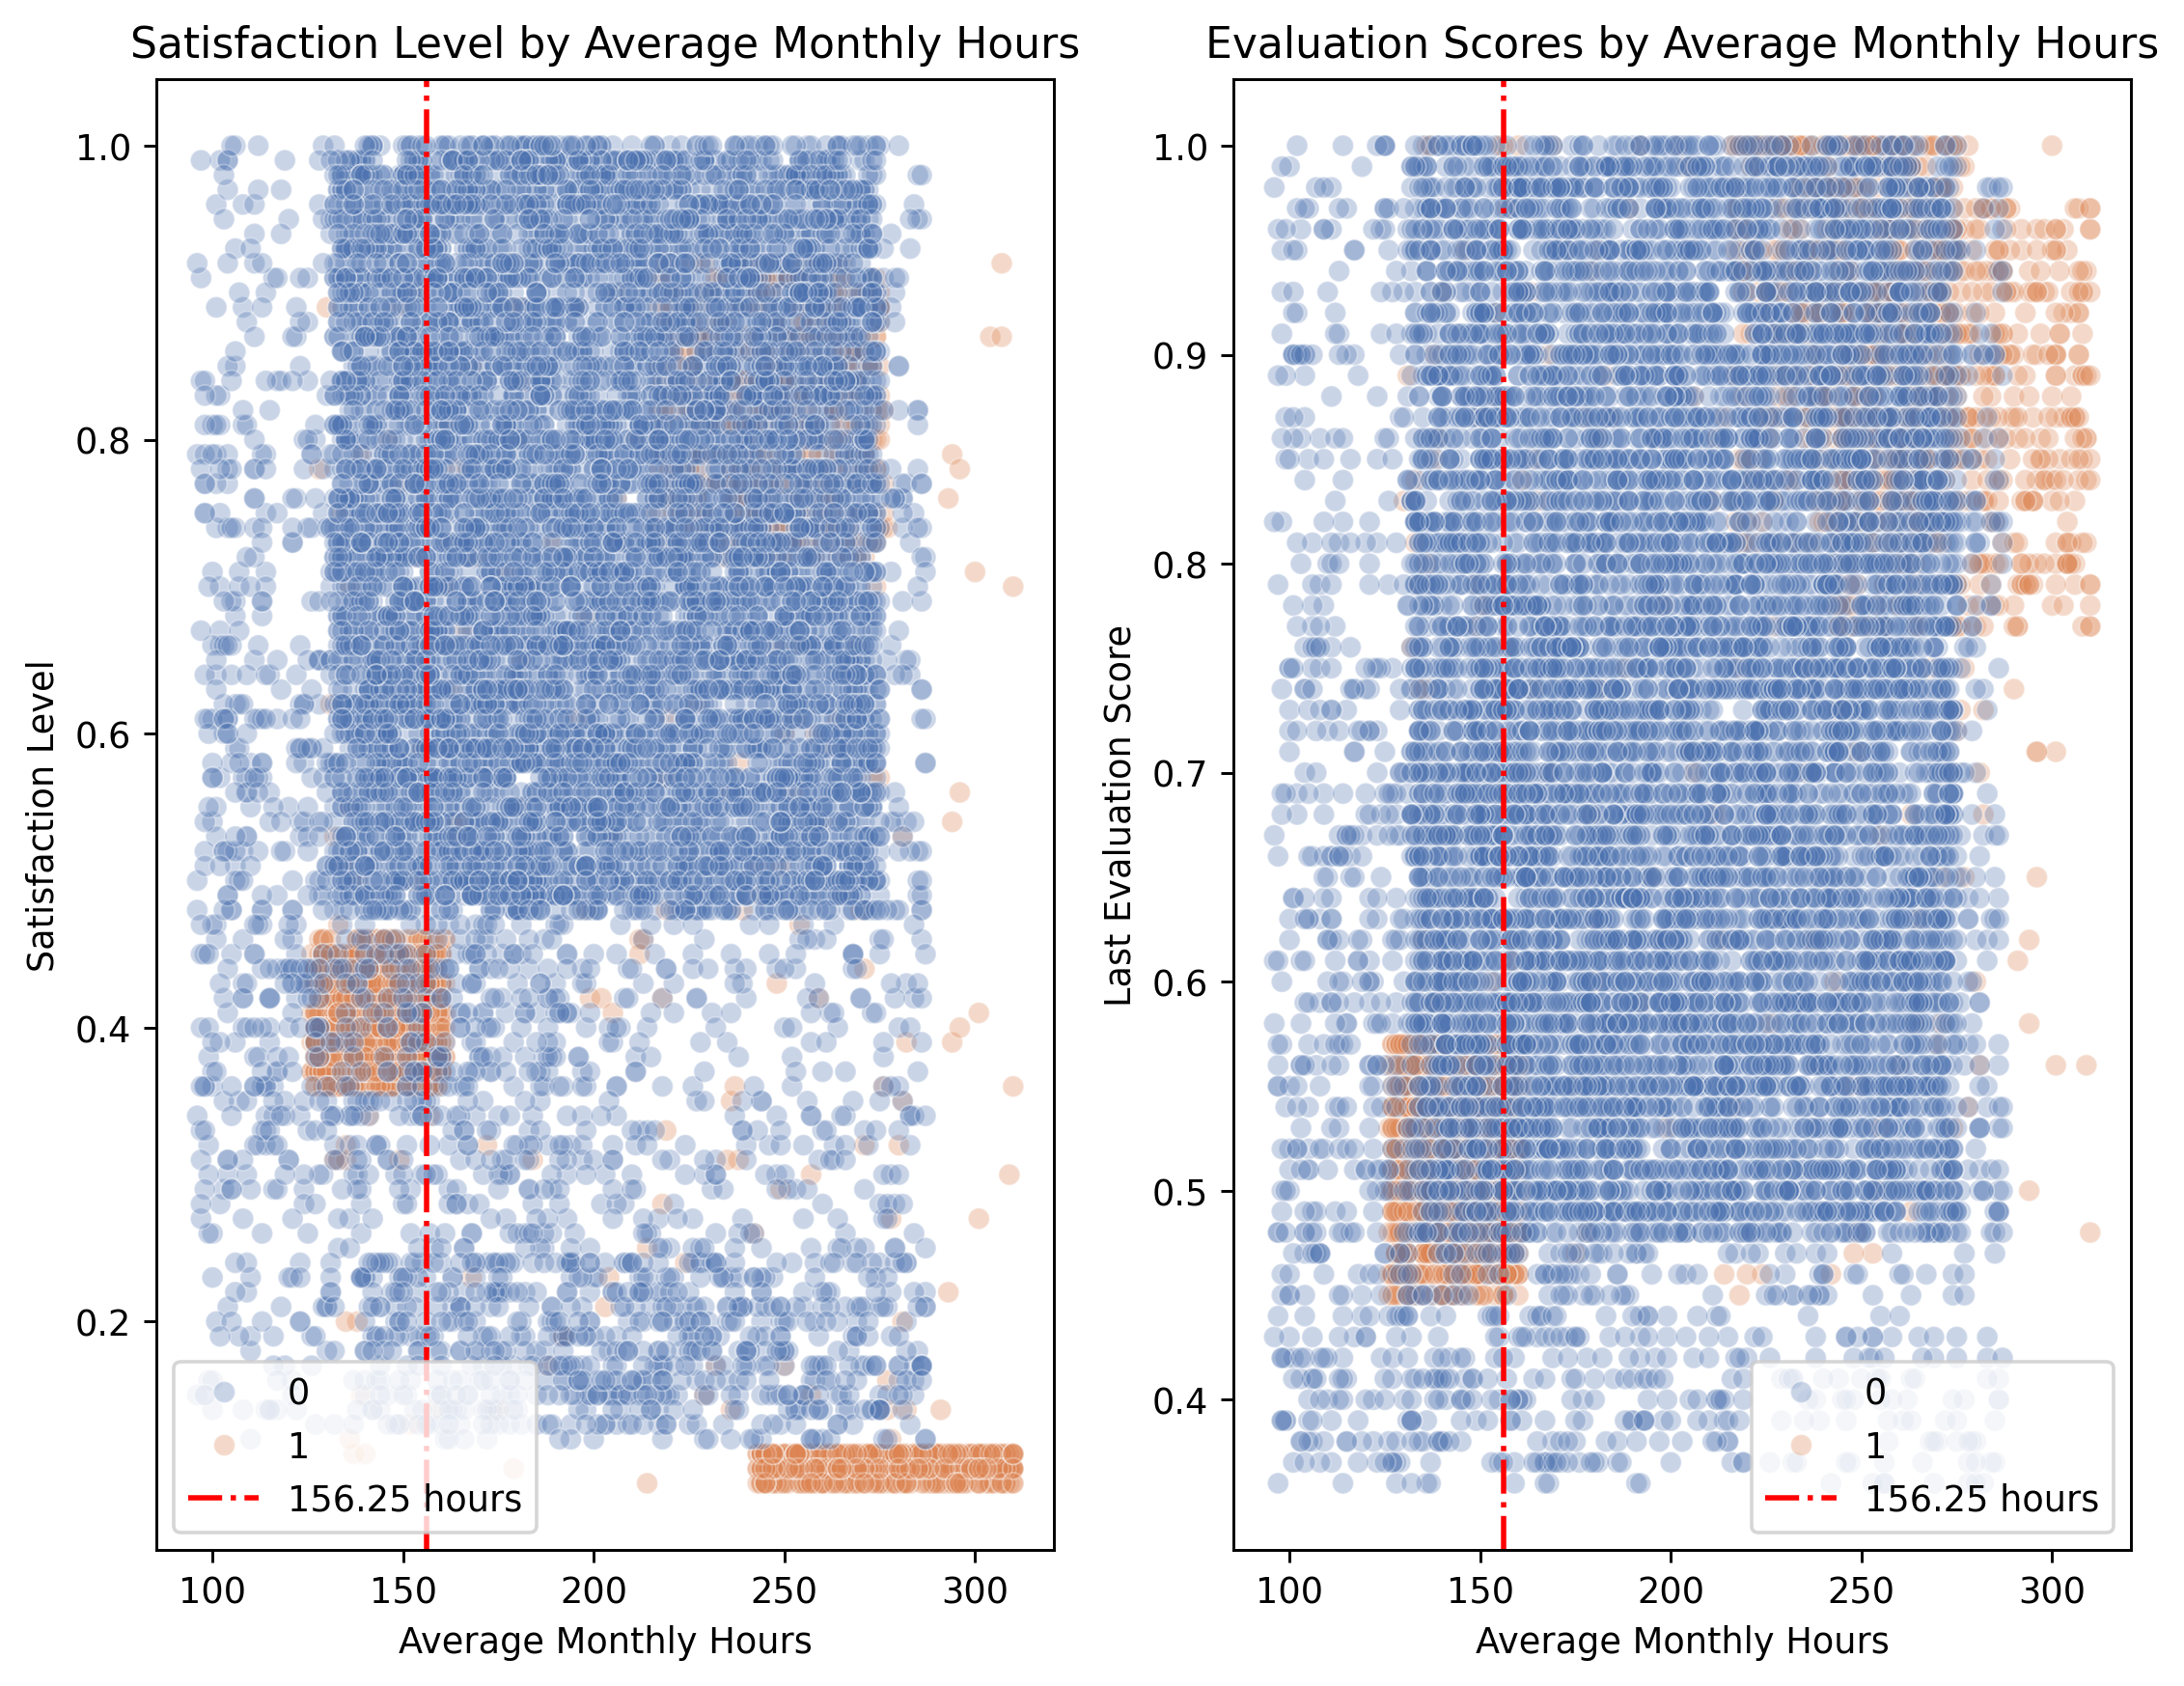

In [21]:
plt.figure()
# average monthly working hours and satisfaction
plt.subplot(121)
sns.scatterplot(df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.3, palette="deep")
plt.axvline(expected_monthly_hours, color="red", ls="-.", label=f"{expected_monthly_hours} hours")
plt.title("Satisfaction Level by Average Monthly Hours"); plt.legend()
plt.xlabel("Average Monthly Hours"); plt.ylabel("Satisfaction Level")

# Working hours and evaluation
plt.subplot(122)
sns.scatterplot(df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.3, palette="deep")
plt.axvline(expected_monthly_hours, color="red", ls="-.", label=f"{expected_monthly_hours} hours")
plt.title("Evaluation Scores by Average Monthly Hours"); plt.legend()
plt.xlabel("Average Monthly Hours"); plt.ylabel("Last Evaluation Score"); plt.show()

---

*Just had to point this out: look at the highly unusual shape of the distributions here. This atypical pattern suggests data manipulation. I wonder why... maybe this Kaggle dataset is synthetic.* Well, I'll stop digressing and continue with the EDA.

---

Firstly, the figure above is just another way to see that every month most employees are working a lot more than 156.25 hours -- the number of hours they can be reasonably expected to work.

About Satisfaction Levels (plot on the left), there are three distinct groups of employees that left:

1. Orange bar at the bottom-right -- These employees were really overworked. They had the lowest satisfaction (as low as 9%), which could be related to the fact that many of them were working upwards of 60-75 hours every week throughout the year.
2. Orange cube at center-left -- Even though most of these people were working normal hours, most of them had satisfaction levels around 40%. It is possible that these people felt pressured to overwork, considering many of their colleagues worked twice many hours every month. This could have driven them to leave.
3. Orange blob near the upper-right -- This group had high satisfaction levels (most around 80%), and most of them worked over 60 hours every week. It's difficult to speculate their reasons for leaving without access to employee departure surveys. Maybe they left because they found opportunities with better work-life balance.

A substantial number of employees who stayed are working a lot more than 156.25 hours with satisfaction levels ranging from 45% to 100%.

About Evaluation Scores (plot on the right), there are two distinct groups of employees that left:

1. Orange blob near bottom-left -- Employees with low evaluation scores who worked slighly under 156.25 hours every month.
2. Orange blob at upper-right -- Employees who despite being over worked performed really well.

Another thing to note is that working long hours doesn't seem to guarantee better performance. Typically you would expect to see a positive correlation, or $∩$ (upside down U) shaped distribution -- where employees tend not to perform well when they are either overworked or working below normal work hours.

**Promotion (in the last 5 years) vs Average Monthly Hours**

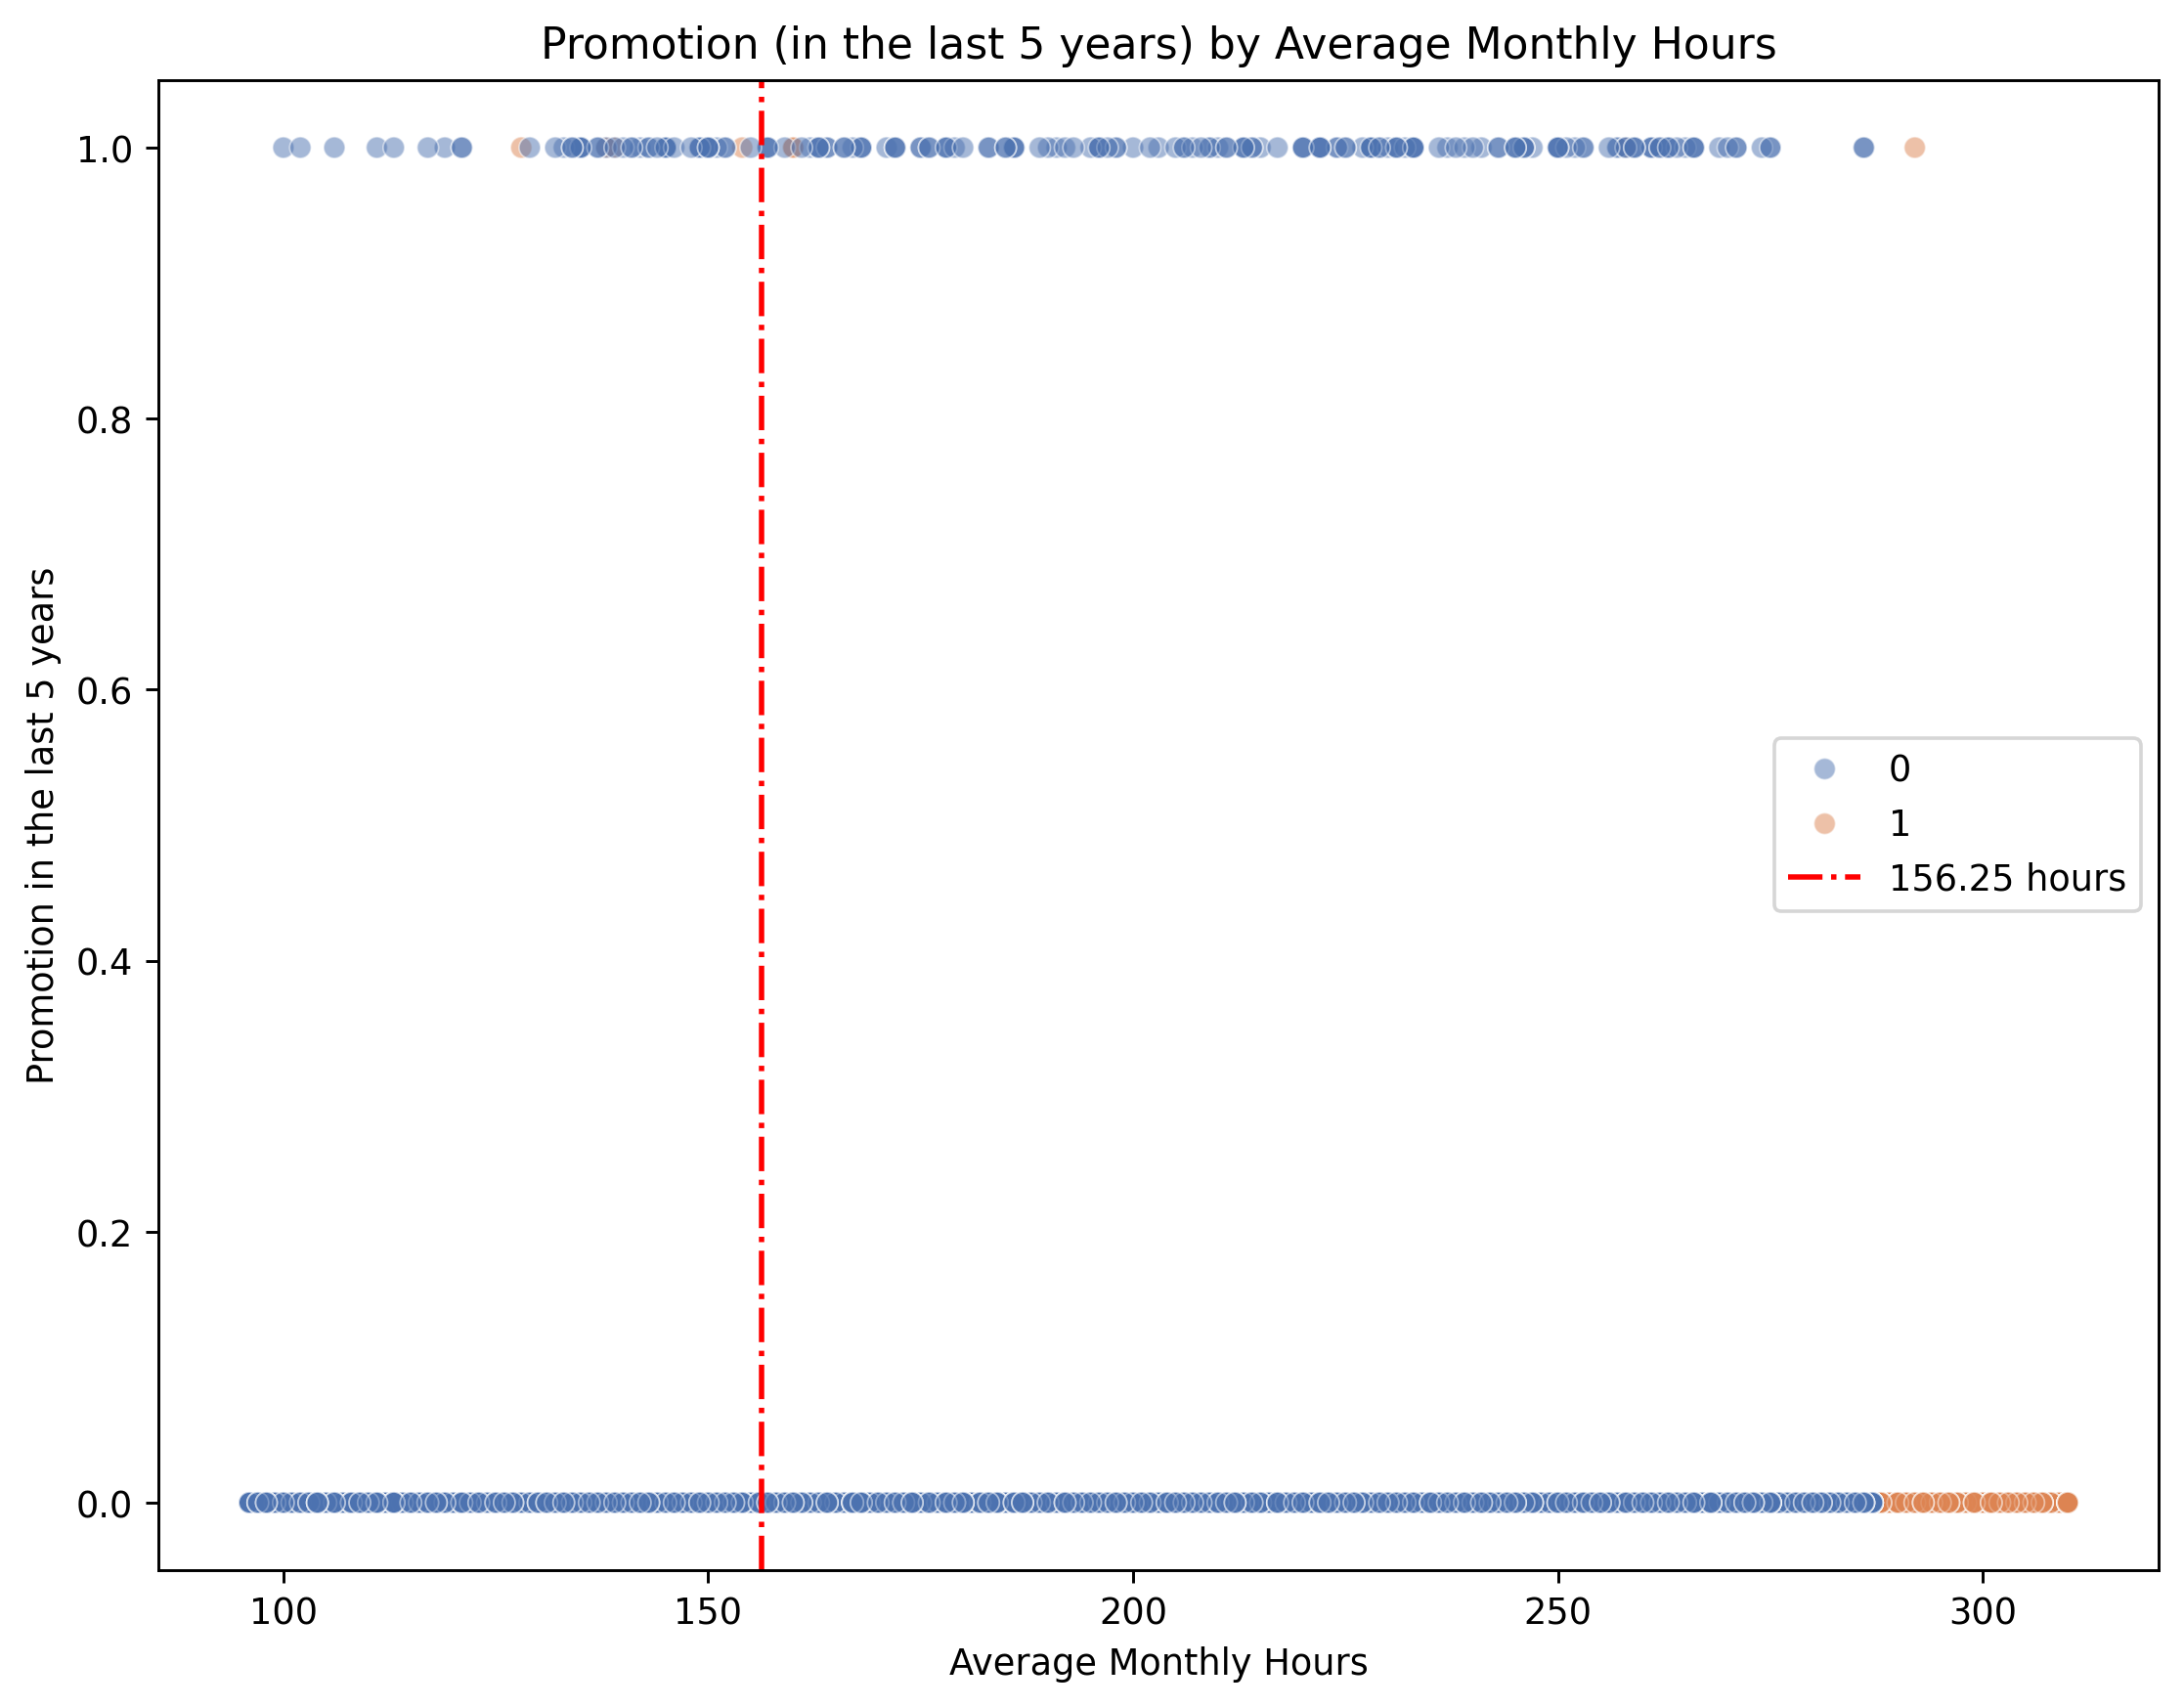

In [22]:
plt.figure()
sns.scatterplot(df, x='average_monthly_hours', y='promotion_last_5years', hue='left', palette="deep", alpha=0.5)
plt.axvline(expected_monthly_hours, color="red", ls="-.", label=f"{expected_monthly_hours} hours")
plt.title("Promotion (in the last 5 years) by Average Monthly Hours"); plt.legend()
plt.xlabel("Average Monthly Hours"); plt.ylabel("Promotion in the last 5 years"); plt.show()

Three things are immediately striking from the plot above: 
1. The employees who were promoted in the last 5 years were not necessarily the ones who worked the most.
2. Very few employees who were promoted in the last 5 year left.
3. Almost all of the employees that left were those who worked the longest hours, yet did not get promoted in the last 5 years.

### EDA Insights

Employee turnover appears to be correlated with management practices. Data suggests a connection between employee departures and the following factors:

- Longer Work Hours. Many of the employees are overworked.
- High project volume.
- Lower employee satisfaction -- might be contributing to feelings of demotivation.
- Working long hours doesn't seem to guarantee better performance (evaluation scores), nor promotion.
- Four-year employees tended to have an unusually low satisfaction level. This needs to be investigated further.

Conversely, the data indicates a trend of increased retention among employees with tenure exceeding six years.

### Modelling

The goal is to predict employee turnover. The categorical nature of the target variable "left" necessitates a binary classification approach, as it can only adopt two values (1: Left, 0: Stayed).

I am going to build and compare Logistic Regression and a Tree-based Machine Learning model, since they are both well-suited for this task.

**Logistic Regression**

In [23]:
logreg_df = df.copy()

# Encoding categorical variable "salary"
salary_encoder = LabelEncoder()
salary_encoder.fit(logreg_df['salary'])
logreg_df['salary'] = salary_encoder.transform(logreg_df['salary'])

# Dummy encoding "department"
logreg_df = pd.get_dummies(logreg_df, drop_first=False, dtype=int)

# Since logistic regression is sensitive to outliers
logreg_df = logreg_df[(logreg_df['tenure'] >= lower_limit) & (logreg_df['tenure'] <= upper_limit)]

logreg_df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       1              0   
2       4              0     1                      0       2              0   
3       5              0     1                      0       1              0   
4       3              0     1                      0       1              0   
5       3              0     1                      0       1              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [24]:
# Checking class balance in the data
logreg_df['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

The data is not perfectly balanced but since it's not severe, let's continue without resampling.

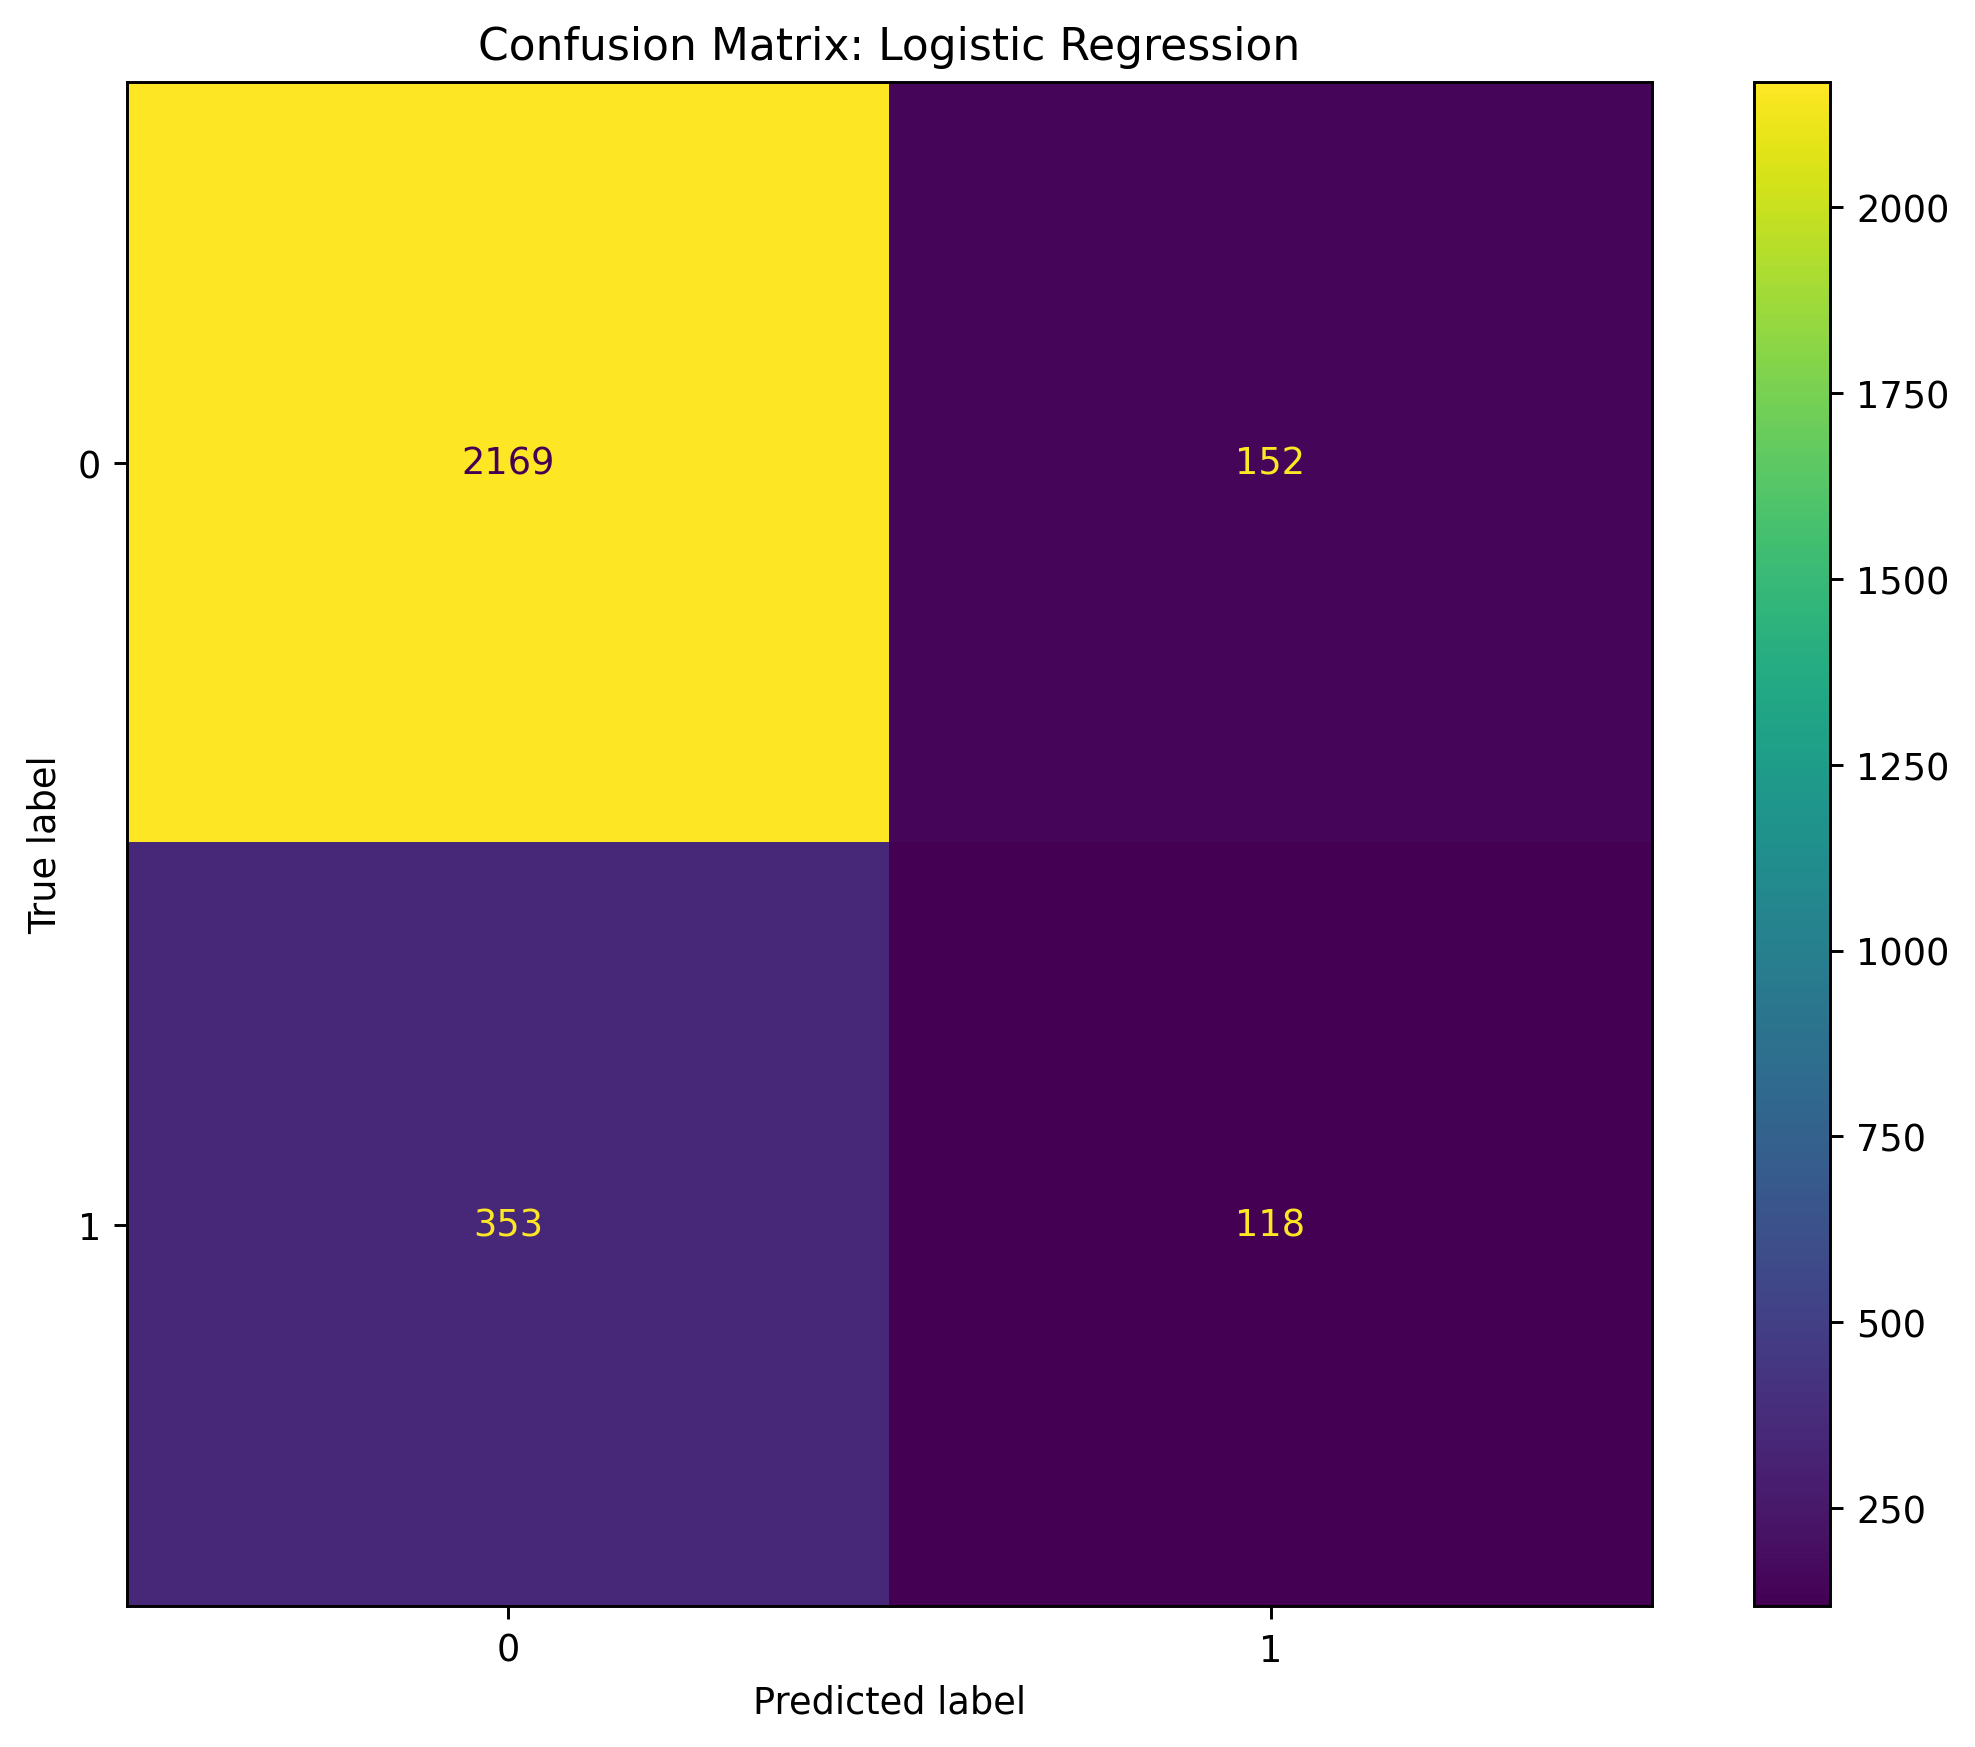

In [25]:
# Isolating the target variable
y = logreg_df['left']

# Selecting features
X = logreg_df.drop(['left'], axis=1)

# Splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=2024)

# Constructing a logistic regression model and fitting it to the training dataset
log_clf = LogisticRegression(random_state=2024, max_iter=2000).fit(X_train, y_train)

# Using the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

# Computing the confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Plotting the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot(values_format='')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

In [26]:
# Classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.25      0.32       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.59      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



While the classification report above indicates strong overall performance for the logistic regression model (accuracy = 82%, weighted: precision = 79%, recall = 82%, f1-score = 80%), its ability to specifically identify employees who left is weaker.

Let's see whether I can improve that through feature engineering.

### Feature Engineering

In [27]:
# New df for round 2 of logistic regression
logreg_df2 = logreg_df.copy()

**Feature Extraction**

In [28]:
# New Feature 1: Work Hours Extended (WHE) = average_monthly_hours - expected_monthly_hours
logreg_df2['WHE'] = logreg_df2['average_monthly_hours'] - expected_monthly_hours

# New Feature 2: overworked = 'average_monthly_hours' > 1.15 * expected_monthly_hours
logreg_df2['overworked'] = (logreg_df2['average_monthly_hours'] > 1.15*expected_monthly_hours).astype(int)

# New Feature 3: Satisfaction-Tenure Interaction
logreg_df2['sat_ten_inter'] = logreg_df2['satisfaction_level']*logreg_df2['tenure']

**Feature Transformation**

In [29]:
# Transformed Feature 1: Project Density = number_project/tenure
logreg_df2['proj_density'] = logreg_df2['number_project']/logreg_df2['tenure']

### **Logistic Regression - Round 2**

**Feature Selection**

Predictive features can be redundant, highly correlated with other features and not adding anything new to the model. I am going to drop these with the aid of the heat map below.

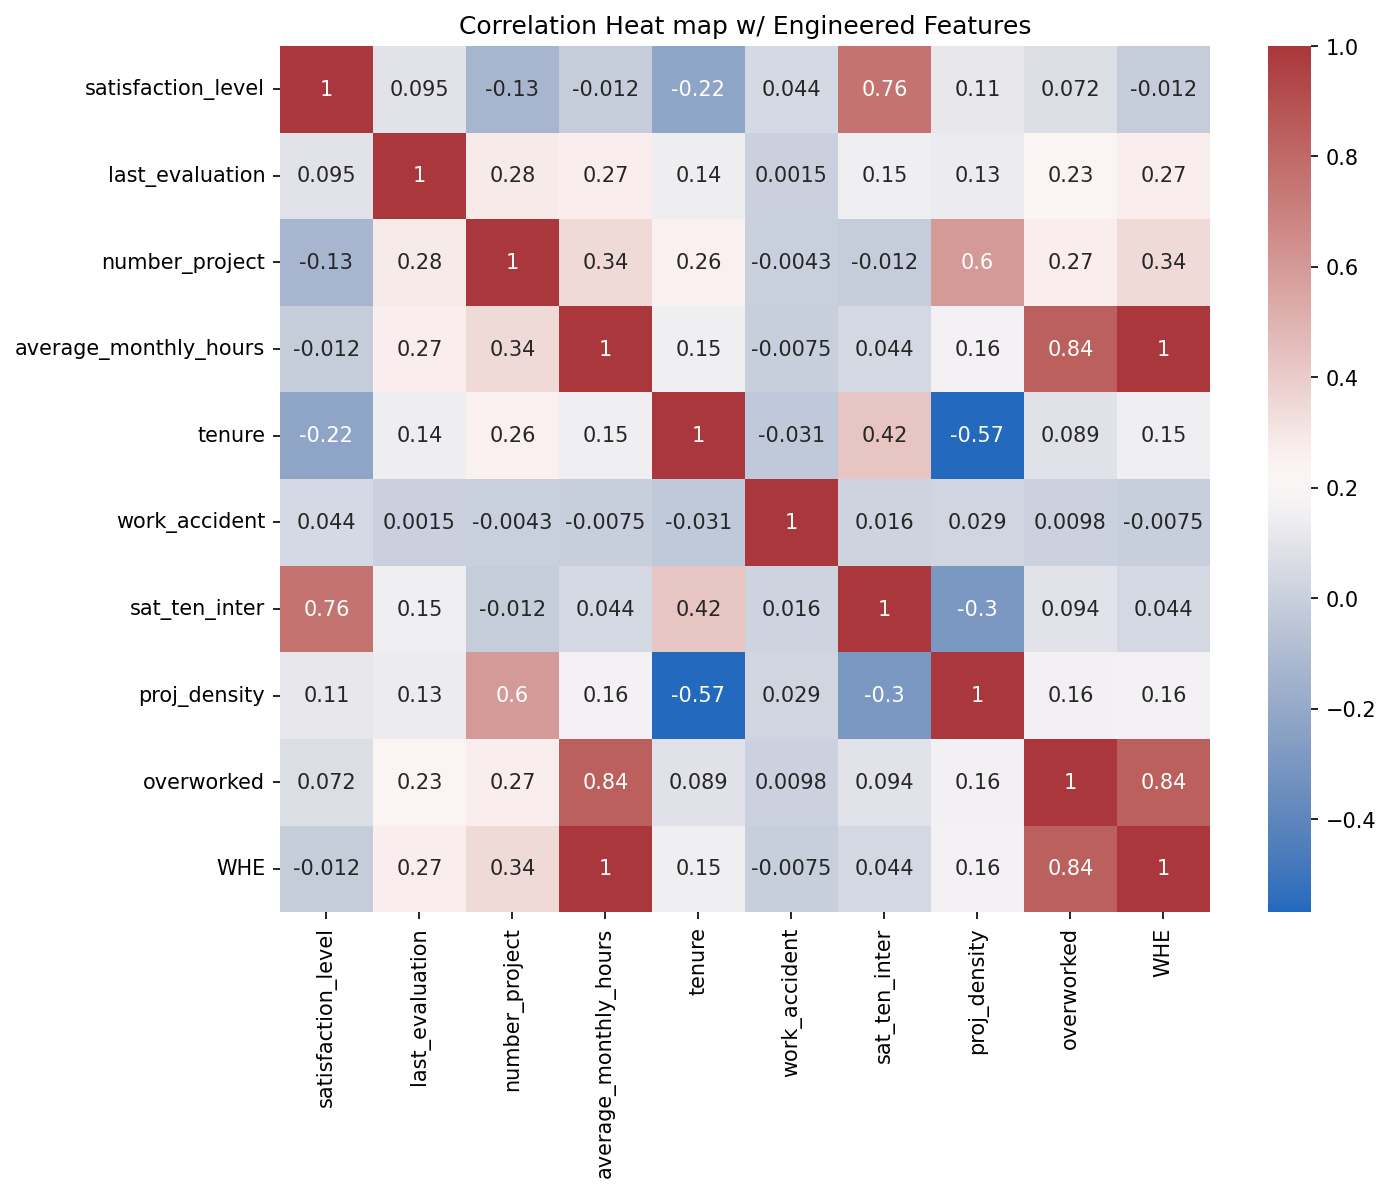

In [30]:
# Correlation Heat map after feature engineering
plt.figure(dpi=150)
sns.heatmap(logreg_df2[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'work_accident', 'sat_ten_inter', 'proj_density', 'overworked', 'WHE']].corr(), annot=True, cmap="vlag")
plt.title("Correlation Heat map w/ Engineered Features")
plt.show()

In [31]:
# Selecting features
X2 = logreg_df2.drop(['left', 'average_monthly_hours'], axis=1)

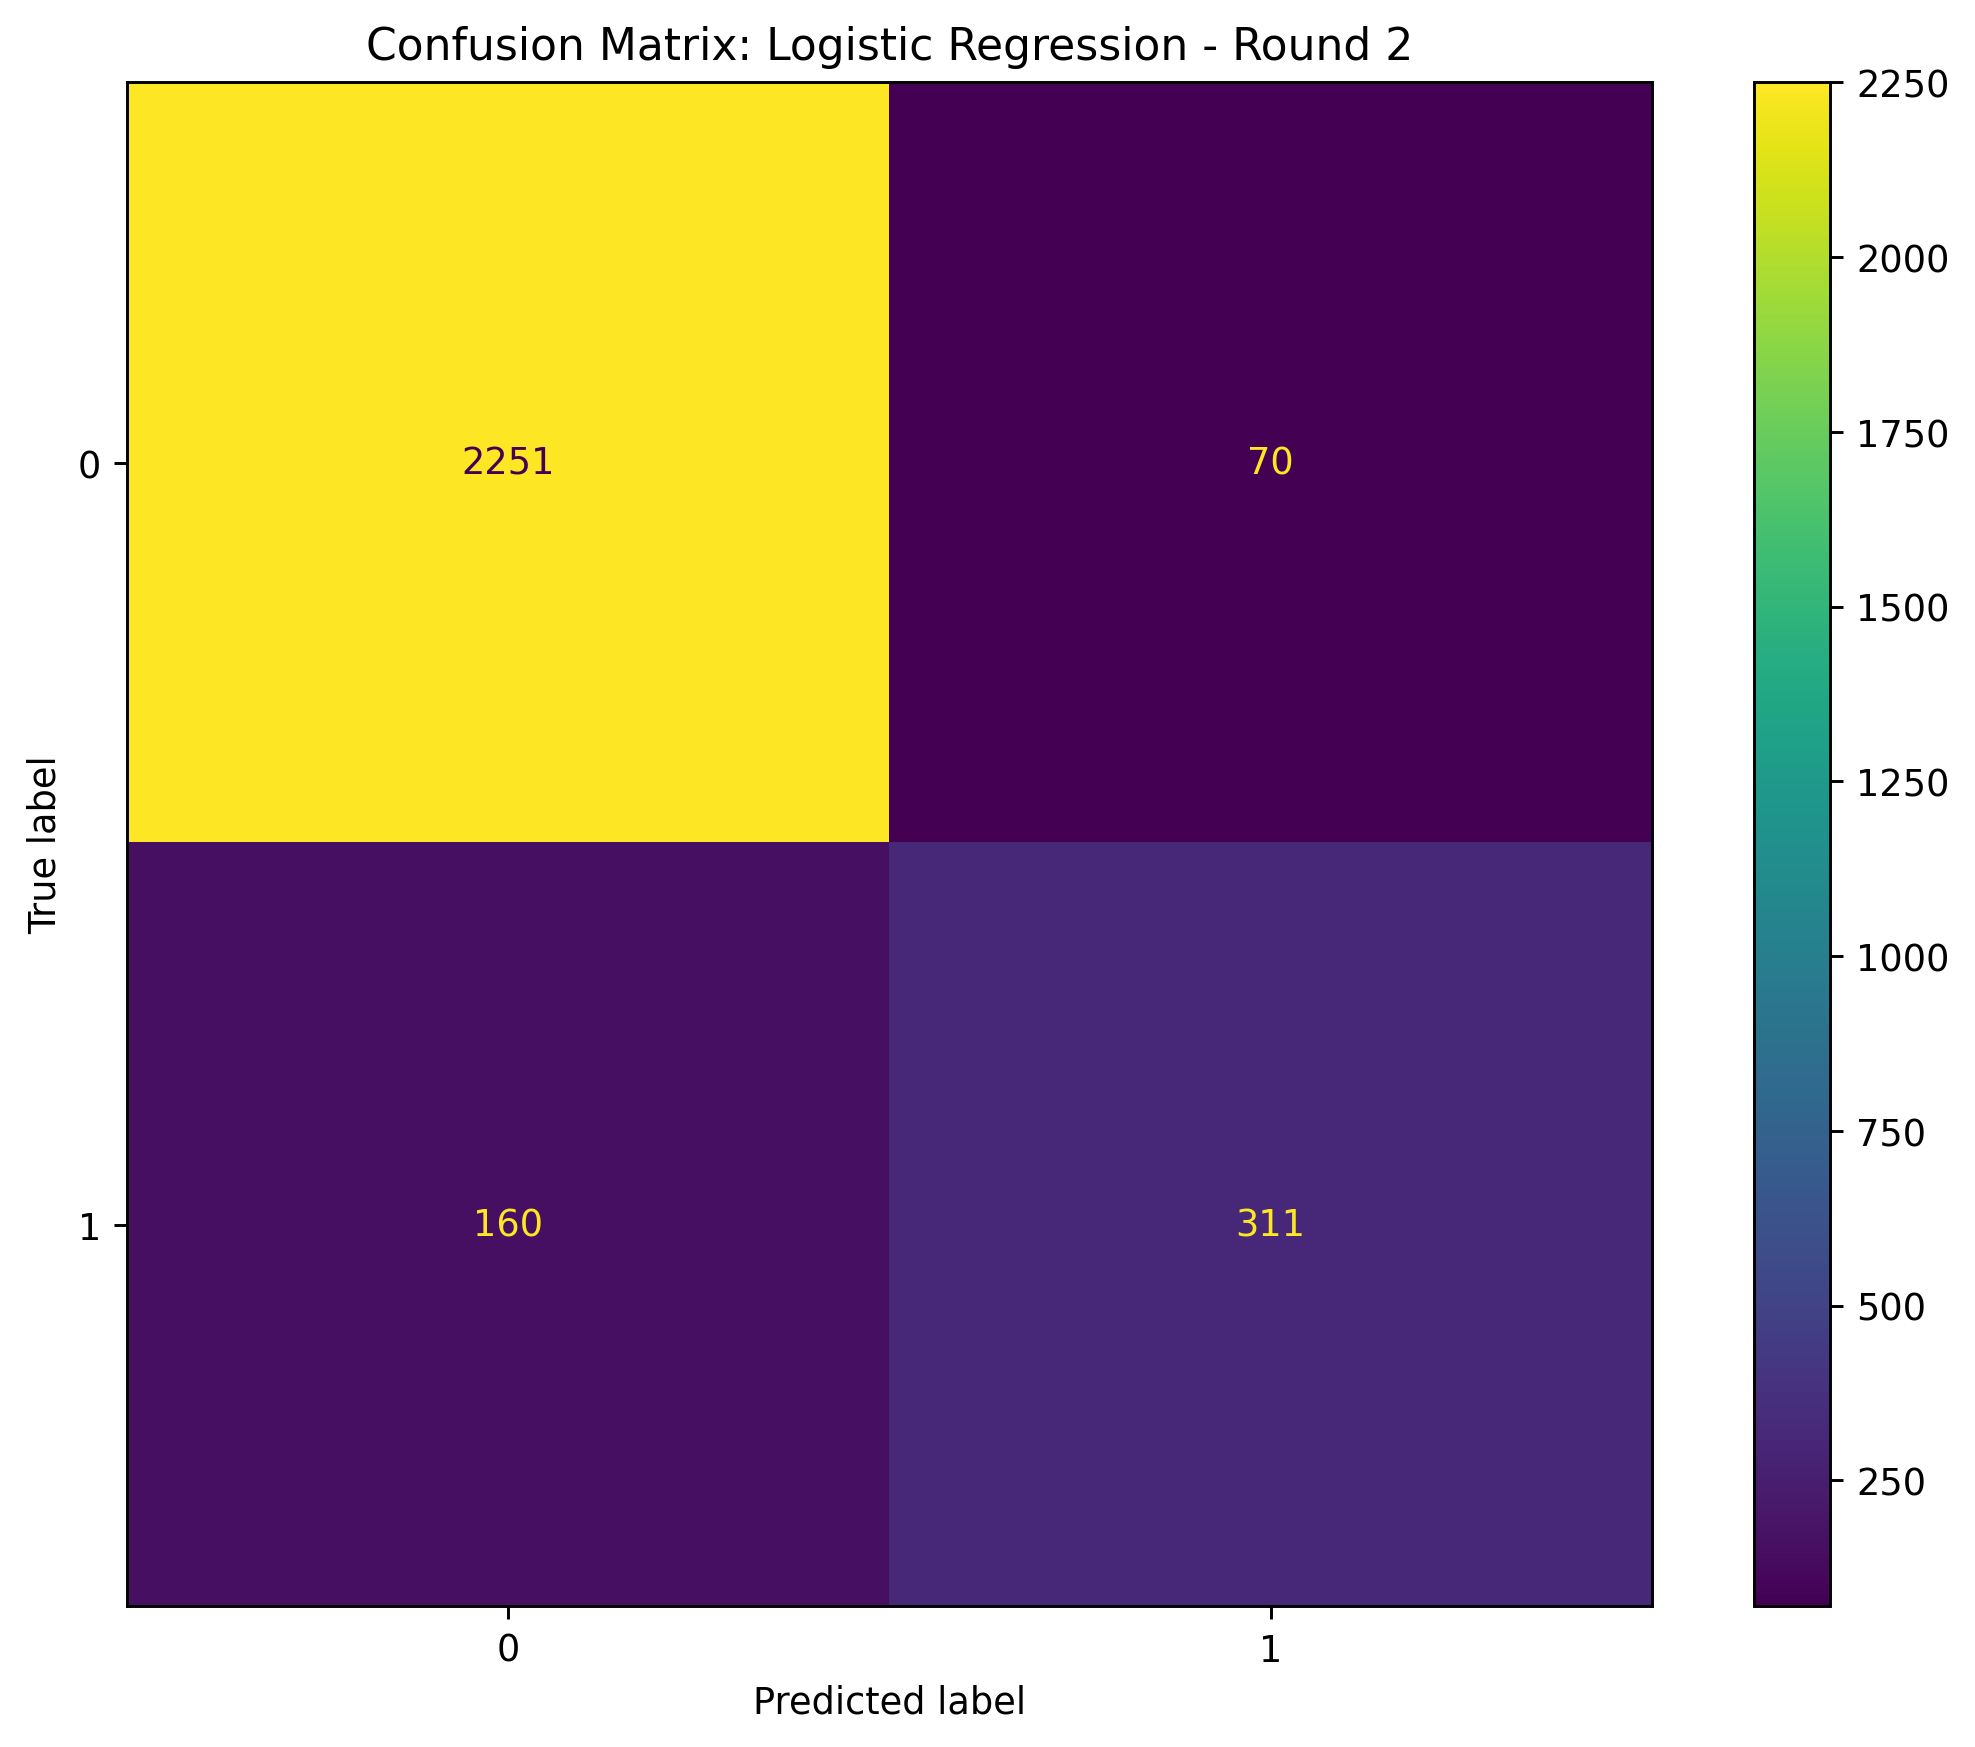

In [32]:
# Isolating the target variable
y2 = logreg_df2['left']

# Splitting the data into training set and testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, stratify=y2, random_state=2024)

# Constructing a logistic regression model and fitting it to the training dataset
log_clf2 = LogisticRegression(random_state=2024, max_iter=2000).fit(X_train2, y_train2)

# Using the logistic regression model to get predictions on the test set
y_pred2 = log_clf2.predict(X_test2)

# Computing the confusion matrix
log_cm2 = confusion_matrix(y_test2, y_pred2, labels=log_clf2.classes_)

# Plotting the confusion matrix
log_disp2 = ConfusionMatrixDisplay(confusion_matrix=log_cm2, display_labels=log_clf2.classes_)
log_disp2.plot(values_format='')
plt.title("Confusion Matrix: Logistic Regression - Round 2")
plt.show()

In [33]:
# Classification report for logistic regression model - round 2
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test2, y_pred2, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.93      0.97      0.95      2321
    Predicted would leave       0.82      0.66      0.73       471

                 accuracy                           0.92      2792
                macro avg       0.87      0.82      0.84      2792
             weighted avg       0.91      0.92      0.91      2792



With engineered features, the new logistic regression model had even stronger overall performance. Accuracy = 92% (82% previously), Weighted: precision = 91% (79% previously), recall = 92% (82% previously), and f1-score = 91% (80% previously).

This improved model is also better at identifying employees who would leave: "Predicted would leave" f1-score = 73% (32% previously), recall (proportion of positives that are correctly classified) = 66% (25% previously).

As the overall goal is to increase employee retention, I think it is very important to predict employees who would leave. A tree-based machine learning model might offer improved performance in this regard.

**Random Forest Model**

I am choosing to build a Random Forest Classifier. A random forest will grow each of its trees by taking a random subset of the available features in the training data to split each node based on the best feature available to that tree. This ensemble approach avoids overfitting by using multiple decision trees to make decisions.

I am going to use the same training/testing dataset with engineered features as before.

In [34]:
# The target variable
y_rf = y2.copy()
# The same selected features as before
X_rf = X2.copy()

# Splitting the data into training set and testing set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.25, stratify=y_rf, random_state=2024)

In [35]:
# Instantiating Random Forest model
rf = RandomForestClassifier(random_state=2024, n_jobs=-1)

# Hyperparameters search dictionary
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiating GridSearch
rf = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [36]:
%%time
# Fitting
rf.fit(X_train_rf, y_train_rf)

CPU times: user 34min 4s, sys: 1min 35s, total: 35min 39s
Wall time: 8min 32s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=2024),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [37]:
# Best params
rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

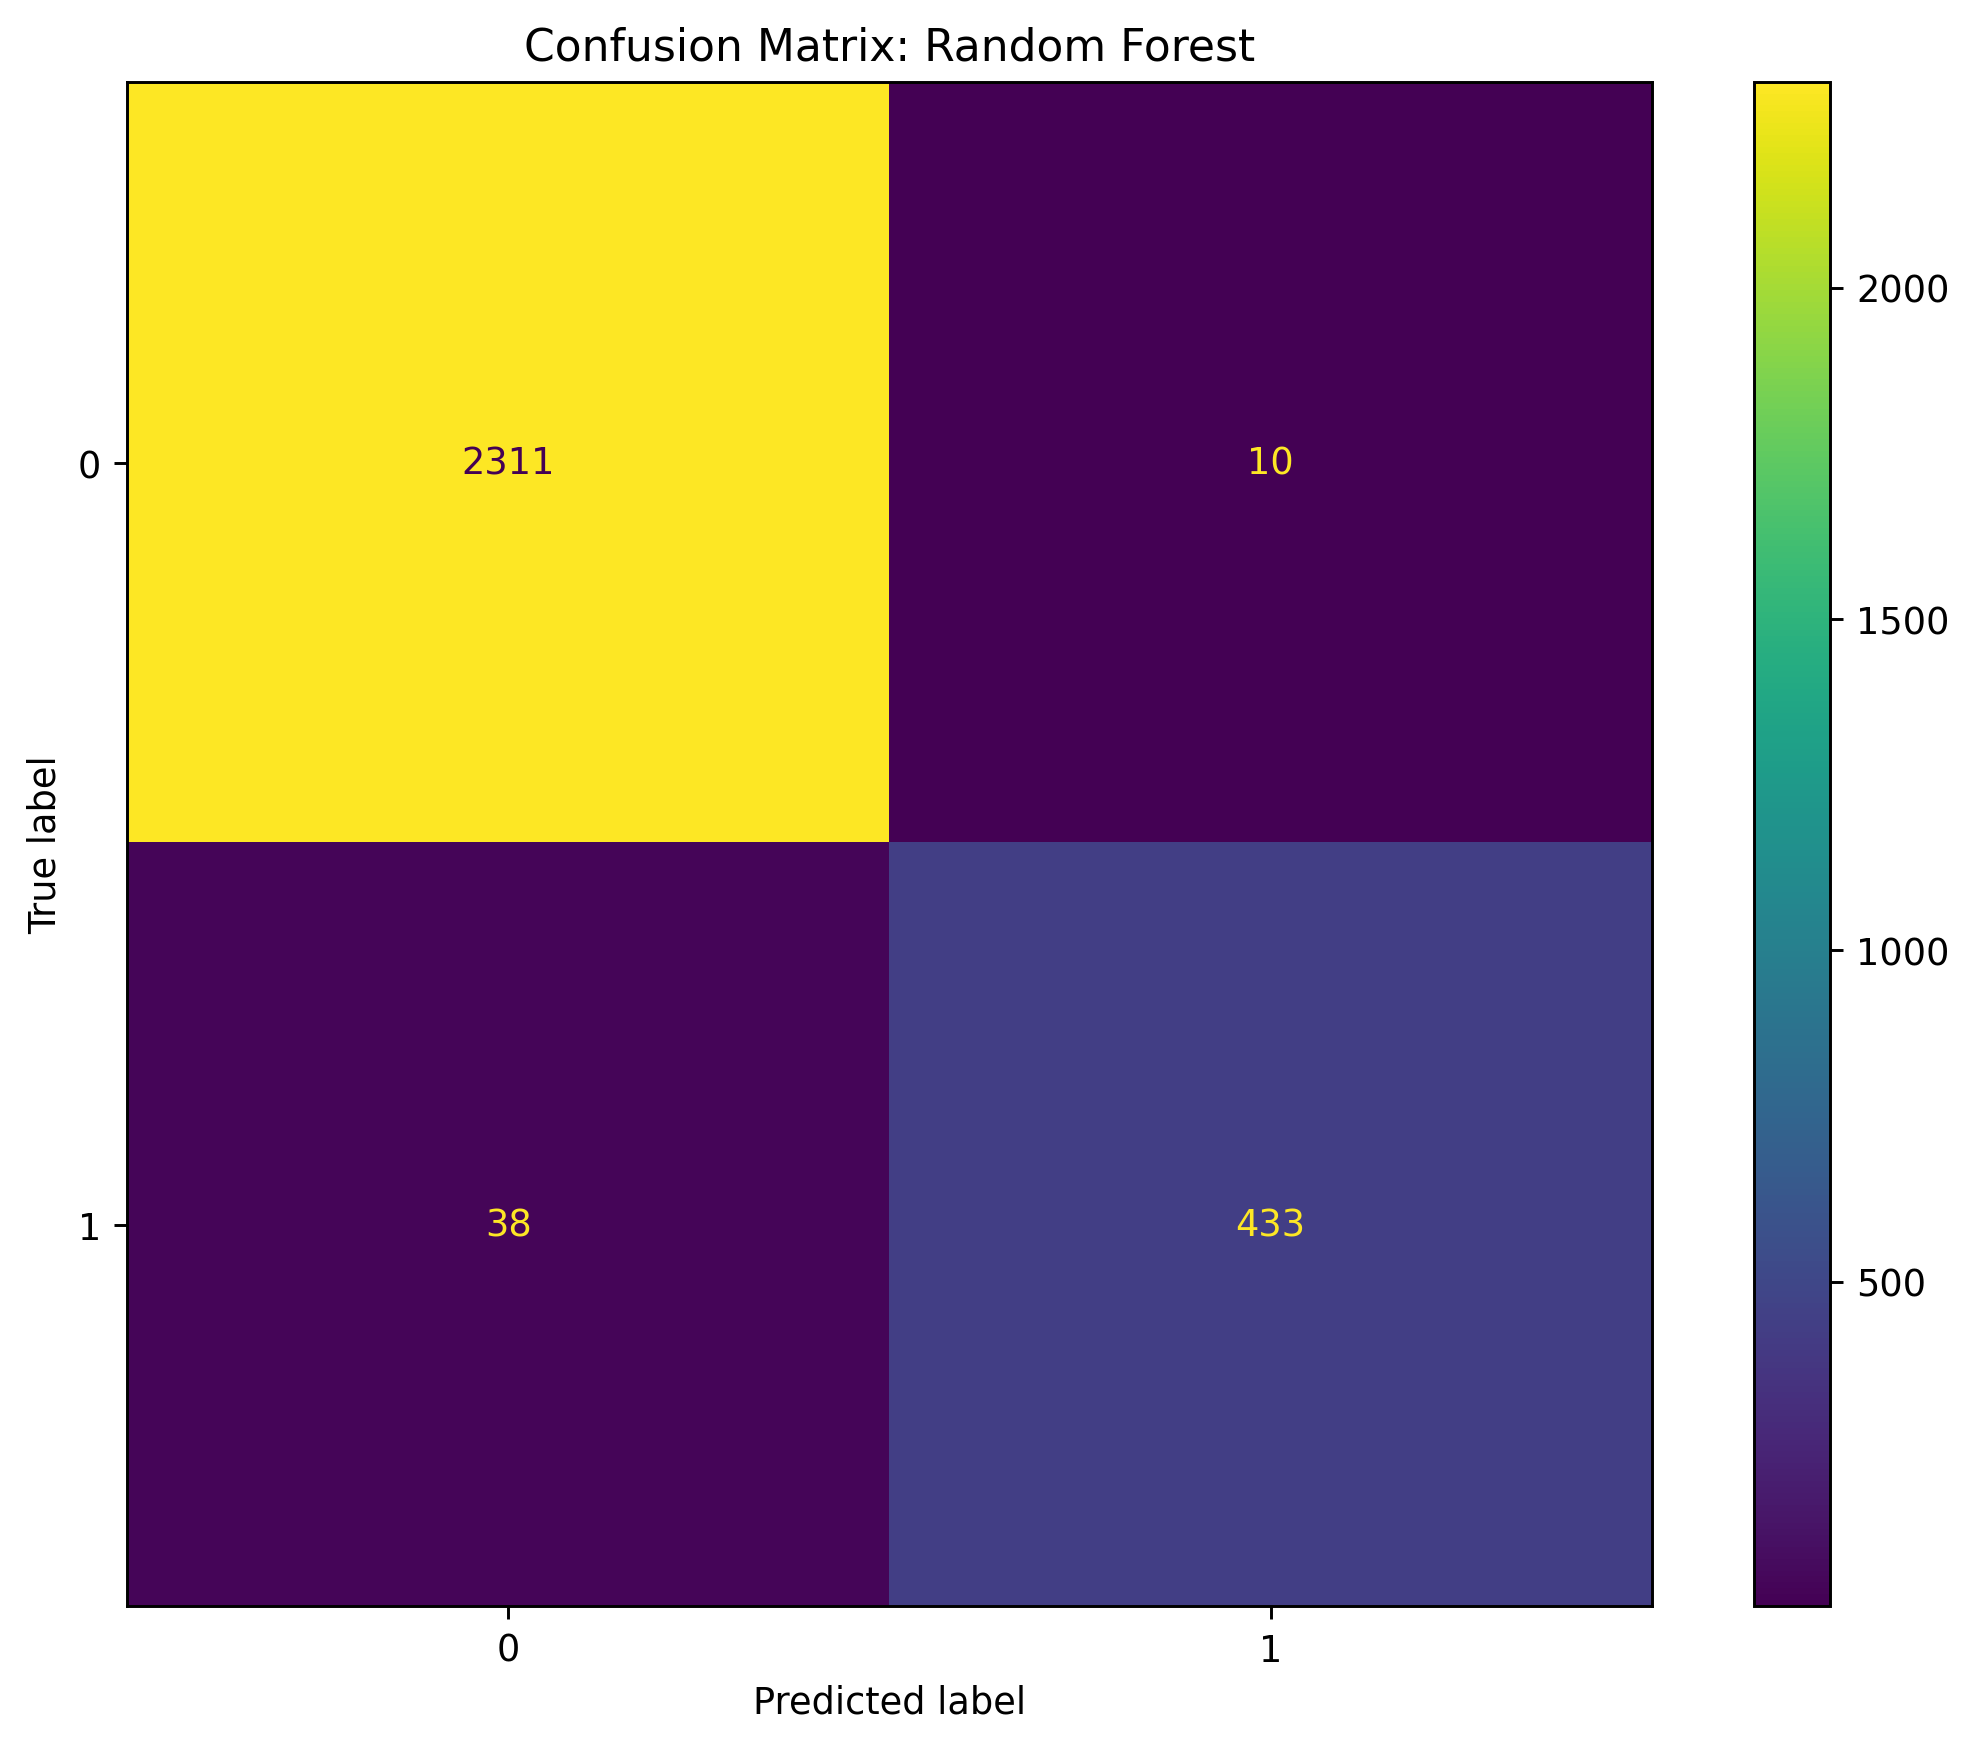

In [38]:
# Testing predictions
preds_rf = rf.best_estimator_.predict(X_test_rf)

# Computing the confusion matrix
cm_rf = confusion_matrix(y_test_rf, preds_rf, labels=rf.classes_)

# Plotting the confusion matrix
disp_cm_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_cm_rf.plot(values_format='');
plt.title("Confusion Matrix: Random Forest")
plt.show()

In [39]:
# Classification report for Random Forest
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test_rf, preds_rf, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      2321
    Predicted would leave       0.98      0.92      0.95       471

                 accuracy                           0.98      2792
                macro avg       0.98      0.96      0.97      2792
             weighted avg       0.98      0.98      0.98      2792



The Random Forest model has a much stronger overall performance than the improved Logistic Regression model (with engineered features).

This model has an accuracy of 98%, weighted: precision = 98%, recall = 98%, and f1-score = 98%.

This model also performed better at identifying employees who would leave: "Predicted would leave" f1-score = 95% (whereas it was 73% for the logistic regression model), recall (proportion of positives that are correctly classified) = 92% (66% for the logistic regression).

### Final Model Results

The Random Forest Model performed the best overall, so I am going to employ this model for driving insights. Below are the evaluation metrics for this model.

In [40]:
rf_test_results = pd.DataFrame({'model': ['Random Forest'], 'precision': [precision_score(y_test_rf, preds_rf)], 'recall': [recall_score(y_test_rf, preds_rf)], 'f1': [f1_score(y_test_rf, preds_rf)], 'accuracy': [accuracy_score(y_test_rf, preds_rf)], 'AUC': [roc_auc_score(y_test_rf, preds_rf)]})
print(rf_test_results,"\n")

           model  precision    recall        f1  accuracy       AUC
0  Random Forest   0.977427  0.919321  0.947484  0.982808  0.957506 



Let's see what this model says are some of the most predictive features for employee turnover.

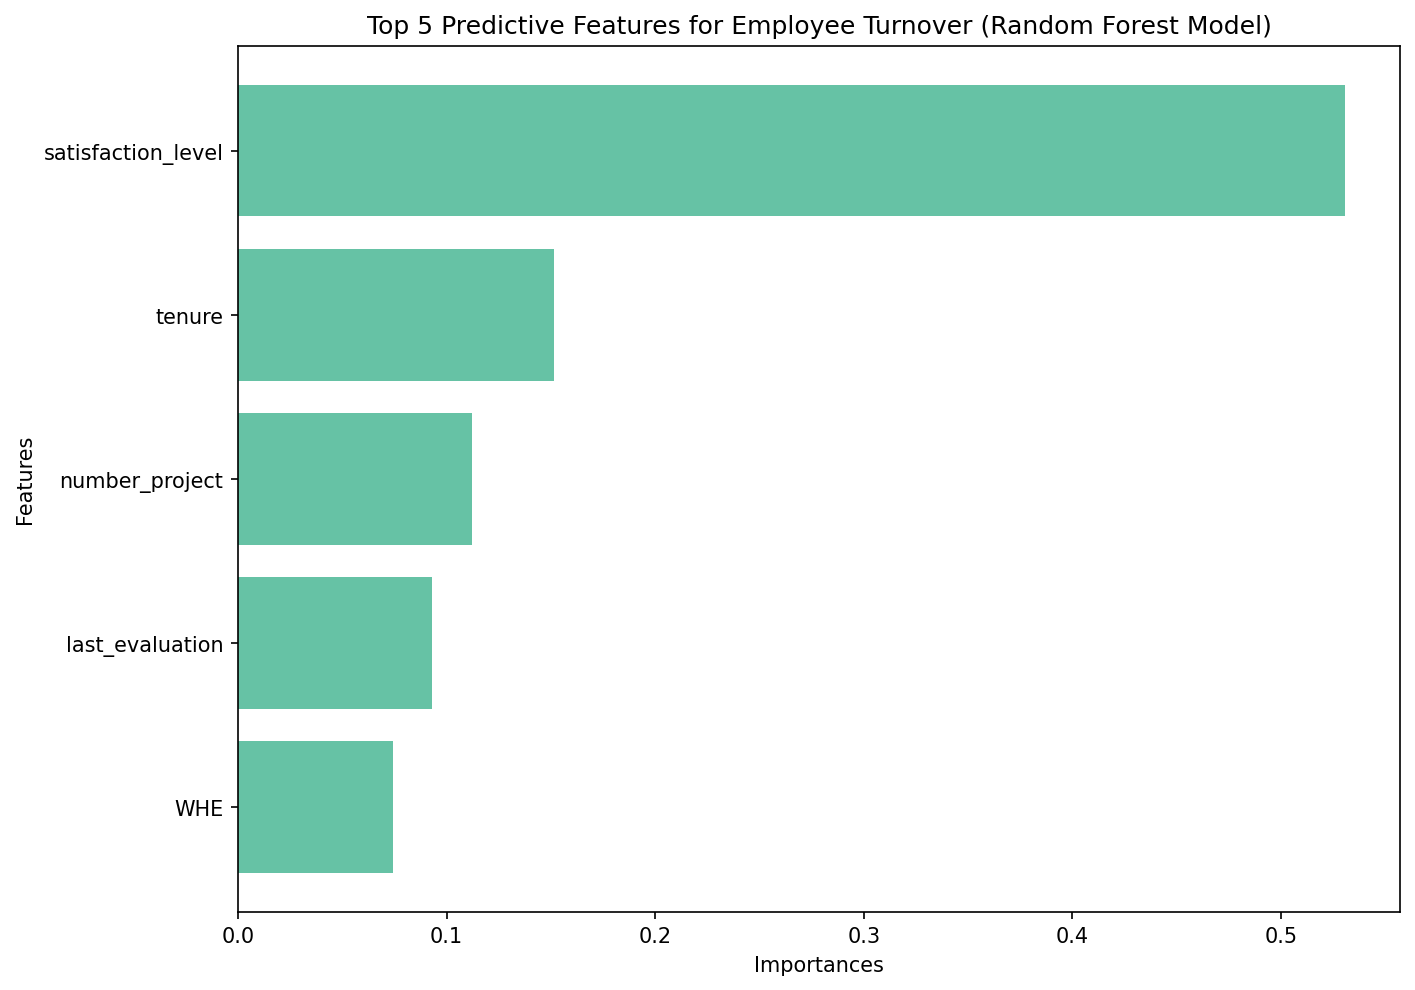

In [41]:
# Feature importances
importances = rf.best_estimator_.feature_importances_
# The top 5 features 
top5_feats = X_rf.columns[np.argsort(importances)[-5:]], importances[np.argsort(importances)[-5:]]

plt.figure(dpi=150)
plt.title("Top 5 Predictive Features for Employee Turnover (Random Forest Model)")
plt.ylabel("Features"); plt.xlabel("Importances")
plt.barh(*top5_feats)
plt.show()

## Conclusion and Recommendations

Based on the results of my analysis, it is evident that management practices are responsible for employee turnover at this company.

The best performing model (Random Forest with AUC of 95.8%) identified the following as the factors that are most predictive of employee turnover:

1. **Employee Satisfaction Level:** My analysis demonstrates clearly that employee satisfaction is more strongly correlated with factors like work evaluation scores and number of projects than with salary.

2. **Tenure:** Four-year employees who depart seem to have an unusually low satisfaction level. Conversely, analysis reveals a trend of increased retention among employees with tenure exceeding six years. Their satisfaction levels aligned with those of newer employees who stayed.

3. **Number of Projects:** High project volume appears to be a significant factor for Employee Turnover. All the employees who handled 7 projects left.

4. **Evaluation Scores:** Working long hours doesn't seem to guarantee better performance (evaluation scores), nor promotion. Data shows no correlation between high evaluation scores and getting promoted in the last 5 years.

5. **Work Hours Extended:** Employees are overworked. Most employees are working more than 200 hours every month.

As for increasing employee retention, my recommendations are as follows:

- Low employee satisfaction might be contributing to feelings of demotivation. HR should mandate company-wide and team-based discussions to critically evaluate and reshape work culture, holding leadership accountable for implementing insights gained.
- HR should investigate further to ascertain what company policies might be impacting the satisfaction levels of four-year employees in particular. Institute changes to reward their dedication and ensure these individuals receive equitable consideration for advancement.
- Limit the number of projects for employees to 3 or 4.
- Evaluation scores should reflect the contributions of employees. Consider a proportionate scale that rewards employees according to their efforts. Immediately inform all employees regarding promotion expectations and policies at the company.
- Clearly define and communicate overtime and compensation policies, along with workload and time-off expectations. Empower employees with a choice: fair pay for extra hours or a sustainable work-life balance.

© 2024  M Sabih Armaghan. All Rights Reserved.